# $\color{darkblue}{\text{Kalender, Årstall, Måned og ukenummer}}$

In [2]:
# Install necessary library
!pip install emoji

# Import necessary libraries
import emoji
import unicodedata

# Function to get flag emoji using unicodedata
def get_flag_emoji(country_code):
    return ''.join([unicodedata.lookup(f'REGIONAL INDICATOR SYMBOL LETTER {char}') for char in country_code.upper()])

# Get Norwegian flag emoji
norwegian_flag = get_flag_emoji('NO')
print(norwegian_flag)  # 🇳🇴

# Use emoji library to emojize text
result = emoji.emojize(f'Python er helt konge :grinning_face:, :grinning_face_with_smiling_eyes:, {norwegian_flag}')
print(result)  # 'Python er helt konge 😀, 😁, 🇳🇴'

# Use emoji library to demojize text
result = emoji.demojize('Python er👍')
print(result)  # 'Python er :thumbs_up:'

🇳🇴
Python er helt konge 😀, 😄, 🇳🇴
Python er:thumbs_up:


In [18]:
import calendar
from datetime import date

def display_calendar():
    year = int(input("Skriv år: "))
    month = int(input("Skriv måned (1-12): "))

    cal = calendar.TextCalendar(calendar.MONDAY)
    
    # Print the month calendar
    month_calendar = cal.formatmonth(year, month)
    print(month_calendar)

    # Print week numbers
    print("Ukenumre:")
    month_weeks = cal.monthdayscalendar(year, month)
    for week in month_weeks:
        # Find the first day of the week that is not 0 (which means no day)
        first_day = next((day for day in week if day != 0), None)
        if first_day:
            week_number = date(year, month, first_day).isocalendar()[1]
            print(f"Uke {week_number}: {week}")

display_calendar()

Skriv år:  2025
Skriv måned (1-12):  3


     March 2025
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30
31

Ukenumre:
Uke 9: [0, 0, 0, 0, 0, 1, 2]
Uke 10: [3, 4, 5, 6, 7, 8, 9]
Uke 11: [10, 11, 12, 13, 14, 15, 16]
Uke 12: [17, 18, 19, 20, 21, 22, 23]
Uke 13: [24, 25, 26, 27, 28, 29, 30]
Uke 14: [31, 0, 0, 0, 0, 0, 0]


# $\color{red}{\text{Kapittel 1 - Prosent}}$

In [1]:
# Omgjøring mellom desimaltall, brøk og prosent
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def decimal_to_fraction_and_percent(digits):
    # Antall desimaler
    exponent = len(digits.split('.'))

    # Konverter input til et flyttall
    n = float(digits)

    # Beregn teller og nevner for brøken
    numerator = int(n * 10**exponent)
    denominator = 10**exponent

    # Beregn prosent
    percent = n * 100

    # Reduser brøken
    factor = gcd(numerator, denominator)
    num = numerator // factor
    den = denominator // factor

    # Output med maks 3 desimaler
    print("Desimaltallet er", round(n, 3))
    print("Brøken er", num, "/", den)
    print("Prosenten er", round(percent, 3), "%")

def percent_to_decimal_and_fraction(percent):
    # Konverter prosent til desimaltall
    decimal = percent / 100

    # Konverter desimaltall til brøk
    digits = str(decimal)
    decimal_to_fraction_and_percent(digits)

def fraction_to_decimal_and_percent(numerator, denominator):
    # Konverter brøk til desimaltall
    decimal = numerator / denominator

    # Beregn prosent
    percent = decimal * 100

    # Output med maks 3 desimaler
    print("Desimaltallet er", round(decimal, 3))
    print("Prosenten er", round(percent, 3), "%")

def main():
    choice = input("Har du et desimaltall du ønsker å omgjøre til prosent og brøk? (ja/nei): ").strip().lower()
    if choice == 'ja':
        digits = input("Skriv inn ett desimaltall, husk punktum, for å konvertere til brøk og prosent: ")
        decimal_to_fraction_and_percent(digits)
    else:
        choice = input("Har du en prosent du ønsker å omgjøre til et desimaltall eller en brøk? (ja/nei): ").strip().lower()
        if choice == 'ja':
            percent = float(input("Skriv inn prosentverdien: "))
            percent_to_decimal_and_fraction(percent)
        else:
            choice = input("Ønsker du å omgjøre en brøk til et desimaltall eller en prosent? (ja/nei): ").strip().lower()
            if choice == 'ja':
                numerator = int(input("Skriv inn telleren: "))
                denominator = int(input("Skriv inn nevneren: "))
                fraction_to_decimal_and_percent(numerator, denominator)
            else:
                print("Ingen konvertering valgt.")

if __name__ == "__main__":
    main()


Desimaltallet er 3.4
Brøken er 17 / 5
Prosenten er 340.0 %


In [3]:
# Funksjon for å beregne prosentandel mellom delen av tallet og det hele
def beregn_prosentandel(delen, hele):
    return (delen / hele) * 100

# Gitte verdier
delen = 25
hele = 30

# Beregn prosentandelen
prosent = beregn_prosentandel(delen, hele)

print(f"{delen} er {prosent:.2f} % av {hele}.")

25 er 83.33 % av 30.


In [17]:
# Funksjon for å beregne prosentandel
def beregn_prosentandel(delen, hele):
    return (delen / hele) * 100

# Ny verdi = Opprinnelig verdi * Vekstfaktor
def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif opprinnelig_verdi is not None and ny_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    elif vekstfaktor is not None and ny_verdi is not None:
        return ny_verdi / vekstfaktor
    else:
        return None

# Be brukeren om verdiene
opprinnelig_verdi = None
vekstfaktor = None
ny_verdi = None

# Spør om opprinnelig verdi
if input("Har du den opprinnelige verdien? (ja/nei) ").strip().lower() == "ja":
    opprinnelig_verdi = float(input("Oppgi den opprinnelige verdien: "))

# Spør om vekstfaktor
if input("Har du vekstfaktoren? (ja/nei) ").strip().lower() == "ja":
    vekstfaktor = float(input("Oppgi vekstfaktoren: "))

# Spør om ny verdi
if input("Har du den nye verdien? (ja/nei) ").strip().lower() == "ja":
    ny_verdi = float(input("Oppgi den nye verdien: "))

# Beregn den ukjente verdien
if opprinnelig_verdi is not None and vekstfaktor is not None:
    ny_verdi = beregn_verdi(opprinnelig_verdi=opprinnelig_verdi, vekstfaktor=vekstfaktor)
    print(f"Den nye verdien er: {ny_verdi}")
elif opprinnelig_verdi is not None and ny_verdi is not None:
    vekstfaktor = beregn_verdi(opprinnelig_verdi=opprinnelig_verdi, ny_verdi=ny_verdi)
    prosent_stigning_minking = (vekstfaktor - 1) * 100
    print(f"Vekstfaktoren er: {vekstfaktor}")
    print(f"Prosent {'stigning' if prosent_stigning_minking > 1 else 'minking'}: {prosent_stigning_minking}%")
elif vekstfaktor is not None and ny_verdi is not None:
    opprinnelig_verdi = beregn_verdi(vekstfaktor=vekstfaktor, ny_verdi=ny_verdi)
    print(f"Den opprinnelige verdien er: {opprinnelig_verdi}")
else:
    print("Du må oppgi minst to av verdiene.")

Har du den opprinnelige verdien? (ja/nei)  nei
Har du vekstfaktoren? (ja/nei)  nei
Har du den nye verdien? (ja/nei)  nei


Du må oppgi minst to av verdiene.


In [1]:
# Oppgave 1.14 Finn .. % av ett tall
prosent = 23
hele_tallet = 432
prosentdelen = prosent/100 * hele_tallet
print(prosent, "% av", hele_tallet, "er", round(prosentdelen, 2))

23 % av 432 er 99.36

In [2]:
# Oppgave 1.34 Finn endringen i prosentpoeng mellom to tall
startprosent = 5.7
sluttprosent = 8.2

prosentpoeng = sluttprosent - startprosent
prosent = prosentpoeng/startprosent*100

print("Endringen i prosentpoeng er:", round(prosentpoeng,2))
print("Endringen i prosent er:", round(prosent,2), "%")

Endringen i prosentpoeng er: 2.5
Endringen i prosent er: 43.86 %

In [4]:
# Oppgave 1.42 Finn vekstfaktoren med en endring på .. %
svar = input("Hva er endringen i prosent?")
prosenten = float(svar)

vekstfaktor = 1 + prosenten/100

print("Vekstfaktoren er:", round(vekstfaktor, 3))

Hva er endringen i prosent? 54


Vekstfaktoren er: 1.54
Vekstfaktoren er: 1.23Vekstfaktoren er: 1.23

Vekstfaktoren er: 1.23

In [ ]:
# Oppgave 1.45
vekstfaktor = 1.39

if vekstfaktor > 1:
  prosent = (vekstfaktor - 1)*100
  print("Økningen er på", round(prosent, 2), "prosent.")
else:
  prosent = (1 - vekstfaktor)*100
  print("Nedgangen er på", round(prosent, 2), "prosent.")

In [5]:
# Oppgave 1.66
folketall = 4000
verdi = folketall
vekstfaktor = 1.025
år = 0

while verdi < folketall*2:
  verdi = verdi * vekstfaktor
  år = år + 1

print(round(verdi, 0))
print(år)

8186.0
29


In [6]:
# Oppgave 11 - Repetisjonsoppgaver kapittel 1
beløp = 5000
vekstfaktor = 1.02
år = 0

while beløp < 100000:
  år = år + 1
  beløp = beløp*vekstfaktor
  beløp = beløp + 10000

print(round(beløp, 0))
print(år)

103522.0
9


In [7]:
# Oppgave 1.115
tall = 250
prosent = 1

while prosent <= 100:
  utregning = tall*prosent/100
  print(prosent, "% av", tall, "er", round(utregning, 2))
  prosent = prosent + 1

1 % av 250 er 2.5
2 % av 250 er 5.0
3 % av 250 er 7.5
4 % av 250 er 10.0
5 % av 250 er 12.5
6 % av 250 er 15.0
7 % av 250 er 17.5
8 % av 250 er 20.0
9 % av 250 er 22.5
10 % av 250 er 25.0
11 % av 250 er 27.5
12 % av 250 er 30.0
13 % av 250 er 32.5
14 % av 250 er 35.0
15 % av 250 er 37.5
16 % av 250 er 40.0
17 % av 250 er 42.5
18 % av 250 er 45.0
19 % av 250 er 47.5
20 % av 250 er 50.0
21 % av 250 er 52.5
22 % av 250 er 55.0
23 % av 250 er 57.5
24 % av 250 er 60.0
25 % av 250 er 62.5
26 % av 250 er 65.0
27 % av 250 er 67.5
28 % av 250 er 70.0
29 % av 250 er 72.5
30 % av 250 er 75.0
31 % av 250 er 77.5
32 % av 250 er 80.0
33 % av 250 er 82.5
34 % av 250 er 85.0
35 % av 250 er 87.5
36 % av 250 er 90.0
37 % av 250 er 92.5
38 % av 250 er 95.0
39 % av 250 er 97.5
40 % av 250 er 100.0
41 % av 250 er 102.5
42 % av 250 er 105.0
43 % av 250 er 107.5
44 % av 250 er 110.0
45 % av 250 er 112.5
46 % av 250 er 115.0
47 % av 250 er 117.5
48 % av 250 er 120.0
49 % av 250 er 122.5
50 % av 250 er 125.0
5

In [8]:
# Oppgave 1.168
beløp = 10000
vekstfaktor = 1.02
år = 0

while beløp < 25000:
  beløp = beløp * vekstfaktor
  år = år + 1

print(round(beløp, 0))
print(år)

25363.0
47


In [9]:
# Oppgave 1.216
prosent = 25
kroner = 1750

pris = kroner * 100 / prosent

print(pris)

7000.0


In [10]:
# Oppgave 1.235
belop = 15000
rente = 1.5
vekstfaktor = 1 + rente / 100
aar = 0

while aar < 10:
    belop = belop * vekstfaktor
    aar = aar + 1

print(f"Etter {aar} år er beløpet {belop:.2f} kroner.")

Etter 10 år er beløpet 17408.11 kroner.


In [11]:
# Oppgave 1.236
beløp = 120000
vekstfaktor = 1.01
år = 0

while beløp < 10:
  beløp = beløp * vekstfaktor
  år = år + 1

print(round(beløp, 0))
print(år)

120000
0


In [12]:
# Oppgave 1.237
beløp = 27500
vekstfaktor = 1.27
år = 1

while år < 10:
  print(år)
  print(round(beløp, 0))
  år = år + 1
  beløp = beløp * vekstfaktor

1
27500
2
34925.0
3
44355.0
4
56331.0
5
71540.0
6
90856.0
7
115387.0
8
146541.0
9
186107.0


In [14]:
# Vekstfaktor - Prosentvis økning
print("Dette programmet regner ut vekstfaktoren "
"ved en økning på en bestemt prosent.")
prosent = float(input("Skriv inn denne prosenten:"))
vekstfaktor = 1 + prosent/100
print(f"Vekstfaktoren ved en økning "
f"på {prosent} % er {vekstfaktor}.")

Dette programmet regner ut vekstfaktoren ved en økning på en bestemt prosent.


Skriv inn denne prosenten: 34


Vekstfaktoren ved en økning på 34.0 % er 1.34.


In [35]:
# Vekstfaktor - Prosentvis nedgang
print("Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.")
prosent = float(input("Skriv inn denne prosenten: "))
nedgangsfaktor = 1 - prosent / 100
nedgangsfaktor = round(nedgangsfaktor, 3)
print(f"Vekstfaktoren ved en nedgang på {prosent} prosent er {nedgangsfaktor}.")

Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.


Skriv inn denne prosenten:  23


Vekstfaktoren ved en nedgang på 23.0 prosent er 0.77.


In [38]:
# Enten prosentvis økning eller prosentvis minking
print("Dette programmet regner ut den nye verdien på et tall "
      "som skal øke eller minke med en viss prosent.")

# Ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
    svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
    if svar != "a" and svar != "m":
        print("Du skrev inn verken 'a' eller 'm'.")
        svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))

# Veivalg mellom økning eller minking
if svar == "a":
    vekstfaktor = 1 + prosent / 100
    endring = "øker"  # bruker 'endring' til å lage et svar som gir mening
elif svar == "m":
    vekstfaktor = 1 - prosent / 100
    endring = "minker"

nytall = round(tall * vekstfaktor, 1)

print(f"Når tallet {tall} {endring} med {prosent} prosent, "
      f"{endring} det til {nytall}.")

Dette programmet regner ut den nye verdien på et tall som skal øke eller minke med en viss prosent.


Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'. m
Skriv inn tallet som skal få en prosentvis endring:  105
Skriv inn prosenten tallet skal endres med:  20


Når tallet 105.0 minker med 20.0 prosent, minker det til 84.0.


In [ ]:
# Prosentvis økning (a) eller prosentvis minking (m) i flere omganger
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent et visst antall ganger.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))
n = float(input("Skriv inn hvor mange ganger tallet skal endres: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor**n

print(f"Når tallet {tall} {endring} med {prosent} prosent "
  f"{n} ganger, {endring} det til {nytall}.")
print ("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Dette programmet regner ut den prosentvise økningen når et tall øker fra en verdi til en annen.
print("Dette programmet regner ut den prosentvise økningen når et tall øker fra en verdi til en annen.")

# Skriv inn det opprinnelige tallet
gammelverdi = float(input("Skriv inn det opprinnelige tallet: "))

# Skriv inn hva tallet er etter den prosentvise økningen
nyverdi = float(input("Skriv inn hva tallet er etter den prosentvise økningen: "))

# Regn ut vekstfaktor
vekstfaktor = nyverdi / gammelverdi

# Regn ut prosentvis økning
prosent = (vekstfaktor * 100) - 100

# Skriv ut resultatet
print(f"Når et tall øker fra {gammelverdi} til {nyverdi}, er økningen på {prosent:.2f} prosent.")

In [ ]:
# Dette programmet regner ut den prosentvise nedgangen når et tall reduseres fra en verdi til en annen.
print("Dette programmet regner ut den prosentvise nedgangen når et tall reduseres fra en verdi til en annen.")

# Skriv inn det opprinnelige tallet
gammelverdi = float(input("Skriv inn det opprinnelige tallet: "))

# Skriv inn hva tallet er etter nedgangen
nyverdi = float(input("Skriv inn hva tallet er etter nedgangen: "))

# Regn ut reduksjonsfaktor
reduksjonsfaktor = nyverdi / gammelverdi

# Regn ut prosentvis nedgang
prosent = (1 - reduksjonsfaktor) * 100

# Skriv ut resultatet
print(f"Når et tall reduseres fra {gammelverdi} til {nyverdi}, er nedgangen på {prosent:.2f} prosent.")

In [15]:
# Ny verdi = Opprinnelig verdi * Vekstfaktor
def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif opprinnelig_verdi is not None and ny_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    elif vekstfaktor is not None and ny_verdi is not None:
        return ny_verdi / vekstfaktor
    else:
        return None

# Be brukeren om verdiene
opprinnelig_verdi = None
vekstfaktor = None
ny_verdi = None

# Spør om opprinnelig verdi
if input("Har du den opprinnelige verdien? (ja/nei) ").strip().lower() == "ja":
    opprinnelig_verdi = float(input("Oppgi den opprinnelige verdien: "))

# Spør om vekstfaktor
if input("Har du vekstfaktoren? (ja/nei) ").strip().lower() == "ja":
    vekstfaktor = float(input("Oppgi vekstfaktoren: "))

# Spør om ny verdi
if input("Har du den nye verdien? (ja/nei) ").strip().lower() == "ja":
    ny_verdi = float(input("Oppgi den nye verdien: "))

# Beregn den ukjente verdien
if opprinnelig_verdi is not None and vekstfaktor is not None:
    ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
    print(f"Den nye verdien er: {ny_verdi}")
elif opprinnelig_verdi is not None and ny_verdi is not None:
    vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
    print(f"Vekstfaktoren er: {vekstfaktor}")
elif vekstfaktor is not None and ny_verdi is not None:
    opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
    print(f"Den opprinnelige verdien er: {opprinnelig_verdi}")
else:
    print("Du må oppgi minst to av verdiene.")

Har du den opprinnelige verdien? (ja/nei)  ja
Oppgi den opprinnelige verdien:  400
Har du vekstfaktoren? (ja/nei)  nei
Har du den nye verdien? (ja/nei)  


Du må oppgi minst to av verdiene.


In [ ]:
# Prosentvis økning i flere omganger
print("Dette programmet regner ut hva en startsaldo "
  "vokser til etter ett, to og opp til og med et valgt antall år "
  "med en valgfri rente per år.")
startsaldo = float(input("Skriv inn den summen "
  "du ønsker å sette inn:"))
maksaar = int(input("Skriv inn hvor mange år "
  "summen skal stå totalt:"))
rente = float(input("Skriv inn hva renten skal være:"))
vekstfaktor = 1 + rente/100

for aar in range(1, maksaar + 1):
  saldo = startsaldo * vekstfaktor**aar
  print(f"Etter {aar} år har {startsaldo:.2f} kroner "
    f"vokst til {saldo:.2f} kroner.")

print(f"Renten er {rente} prosent.")
print("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Prosentvis minking i flere omganger
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent et visst antall ganger.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))
n = float(input("Skriv inn hvor mange ganger tallet skal endres: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor**n

print(f"Når tallet {tall} {endring} med {prosent} prosent "
  f"{n} ganger, {endring} det til {nytall}.")
print ("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Enten prosentvis økning eller minking
# informasjon til brukeren av programmet
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage et svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor

print(f"Når tallet {tall} {endring} med {prosent} prosent, "
  f"{endring} det til {nytall}.")

# $\color{green}{\text{Kapittel 2 - Potenser og Røtter}}$

In [47]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
a = 12000000
b = 0.00002

# Beregn produktet
produkt = a * b

# Konverter produktet til standardform
standardform_produkt = til_standardform(produkt)

# Print resultatet og forklaringen
print(f"Produktet av {a} og {b} i standardform er {standardform_produkt}.")
print('Notasjonen "2.40e+02" er en måte å representere tall på i vitenskapelig notasjon. Det betyr (2.40 × 10^2), som er lik 240.')

Produktet av 12000000 og 2e-05 i standardform er 2.40e+02.
Notasjonen "2.40e+02" er en måte å representere tall på i vitenskapelig notasjon. Det betyr (2.40 × 10^2), som er lik 240.


In [6]:
# Oppgave 2.222 Tredje roten av ett positivt heltall
a = input("Skriv inn et positivt tall: ")
a = float(a)
svar = a**(1/3)
print(svar)

Skriv inn et positivt tall:  1


1.0


In [4]:
# Oppgave 10 - Repetisjonsoppgaver kapittel 2
a = 1
while a < 10:
  svar = a**(1/2)
  a = a + 1
  print(svar)

1.0
1.4142135623730951
1.7320508075688772
2.0
2.23606797749979
2.449489742783178
2.6457513110645907
2.8284271247461903
3.0


In [3]:
# Positive og negative eksponenter
print(10**1)
print(10**2)
print(10**3)

print(10**0)

print(10**-1)
print(10**-2)
print(10**-3)

10
100
1000
1
0.1
0.01
0.001


In [2]:
# Mange svar for funksjonen (kvadratrøtter) husk å skrive funksjonen lik 0. Feks x^2 = 2 blir her: x^2-2 = 0
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

eq = input('Enter equation: 0 = ')

solution = solve(eq,x)
for s in solution:
    print("x = ", s)

Enter equation: 0 =  x-2


x =  2


In [1]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = x**2 - 2

solve(eq,x)

[-sqrt(2), sqrt(2)]

In [10]:
#løser for x. Funksjonen blir satt lik 0. Dette vil printe en liste med løsninger for x
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = 2*x - 4

print("x = ", solve(eq,x))

x =  [2]


In [13]:
import sympy
from sympy import symbols, Eq
from sympy.solvers import solve

# Define the variable
x = symbols('x')

# Define the equation
equation = Eq(2*x**2 + 4, 4*x + 2) # Definer høyre og venstre side av = tegnet

# Solve the equation
solutions = solve(equation, x)

print("x =", solutions)

x = [1]


In [ ]:
x1=5
print("Her om dagen så jeg", x1, "svarte katter krysse veien")

In [ ]:
#Definer en funksjon
def f(x):
    return 6-0.2*x

print("f(0) =", f(30))

In [ ]:
# Fra en funksjon regn ut overtidslønn og lønn
def L(x,y):
    return 160*x+240*y
    

print("Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) =", L(52,50),"kr denne uken")

In [ ]:
#Tabell med (x,y) verdier

x = 5
y = 4*x + 3 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 4*x + 3  # Funksjonen
    print(x, "\t", y)

In [ ]:
# En annen måte å lage en tabell med (x,y) verdier

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

In [48]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
frekvens = 4.0 * 10**14  # Hz
bolgelengde = 7.5 * 10**-7  # m

# Beregn lysfarten
lysfart = frekvens * bolgelengde

# Konverter lysfarten til standardform
standardform_lysfart = til_standardform(lysfart)

print(f"Lysfarten er {standardform_lysfart} m/s.")

Lysfarten er 3.00e+08 m/s.


In [49]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
fart = 1.2 * 10**6  # m/s
hubbles_konstant = 2.27 * 10**-18  # s^-1

# Beregn avstanden
avstand = fart / hubbles_konstant

# Konverter avstanden til standardform
standardform_avstand = til_standardform(avstand)

print(f"Avstanden til galaksen er {standardform_avstand} meter ifølge Hubbles lov.")

Avstanden til galaksen er 5.29e+23 meter ifølge Hubbles lov.


In [51]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Beregn uttrykket 2e7 * 4e5 / (4e-2)^2
resultat = 2e7 * 4e5 / (4e-2)**2

# Konverter resultatet til standardform
standardform_resultat = til_standardform(resultat)

print(f"Resultatet av uttrykket i standardform er {standardform_resultat}.")

Resultatet av uttrykket i standardform er 5.00e+15.


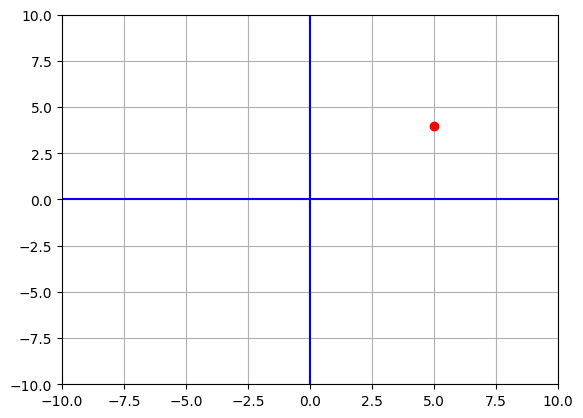

In [2]:
# Plotter ett punkt i ett koordinatssystem
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

plt.plot([5],[4], 'ro')

plt.show()

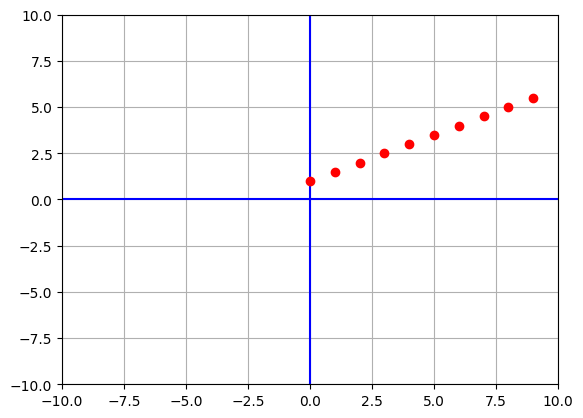

In [4]:
# Plotter mange punkter etter hverandre
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

for x in range(10):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')

plt.show()

x 	 y
-10 	 -4.0
-9 	 -3.5
-8 	 -3.0
-7 	 -2.5
-6 	 -2.0
-5 	 -1.5
-4 	 -1.0
-3 	 -0.5
-2 	 0.0
-1 	 0.5
0 	 1.0
1 	 1.5
2 	 2.0
3 	 2.5
4 	 3.0
5 	 3.5
6 	 4.0
7 	 4.5
8 	 5.0
9 	 5.5
10 	 6.0


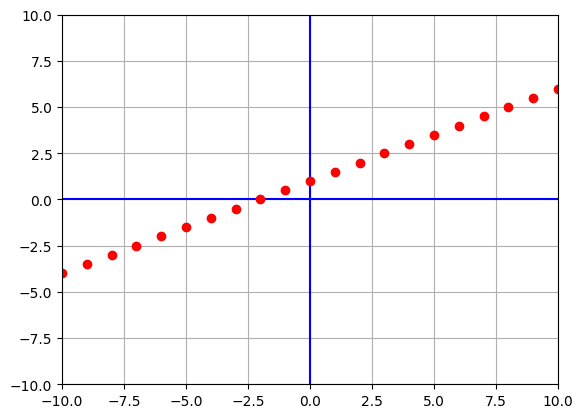

In [6]:
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

print("x \t y")
for x in range(xmin, xmax+1):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')
    print(x,"\t",y)

plt.show()

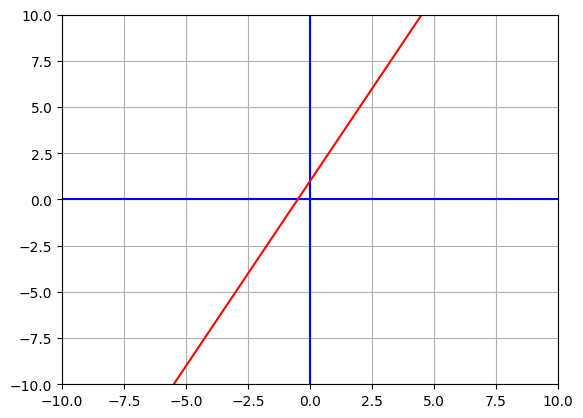

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin) 
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

y = 2*x +1
plt.plot(x,y, 'red')

plt.show()

In [52]:
import math

# Funksjon for å beregne volumet av ei kule med diameter a
def volum_av_kule(diameter):
    radius = diameter / 2
    volum = (4/3) * math.pi * (radius**3)
    return volum

# Funksjon for å beregne volumet av en terning med sidekanter a
def volum_av_terning(sidekant):
    volum = sidekant**3
    return volum

# Funksjon for å beregne forholdet mellom volumet av ei kule og volumet av en terning
def beregn_forhold(diameter):
    volum_kule = volum_av_kule(diameter)
    volum_terning = volum_av_terning(diameter)
    forhold = volum_kule / volum_terning
    return forhold

# Gitt diameter a
a = 1  # Du kan endre denne verdien til et hvilket som helst positivt tall

# Beregn forholdet
forhold = beregn_forhold(a)

print(f"Forholdet mellom volumet av ei kule med diameter {a} og volumet av en terning med sidekanter {a} er {forhold:.2f}.")

Forholdet mellom volumet av ei kule med diameter 1 og volumet av en terning med sidekanter 1 er 0.52.


# $\color{orange}{\text{Kapittel 3 - Variable størrelser}}$

In [58]:
# Program som regner ut fart, avstand og tid ved å spørre brukeren
def konverter_til_sekunder(tid, enhet):
    enhet = enhet.strip().lower()
    if enhet == "år":
        return tid * 365 * 24 * 3600
    elif enhet == "dager":
        return tid * 24 * 3600
    elif enhet == "timer":
        return tid * 3600
    elif enhet == "minutter":
        return tid * 60
    elif enhet == "sekunder":
        return tid
    else:
        raise ValueError(f"Ugyldig tidsenhet: {enhet}")

def konverter_til_meter(avstand, enhet):
    enhet = enhet.strip().lower()
    if enhet == "km":
        return avstand * 1000
    elif enhet == "m":
        return avstand
    elif enhet == "cm":
        return avstand / 100
    elif enhet == "mil":
        return avstand * 1609.34
    else:
        raise ValueError(f"Ugyldig avstandsenhet: {enhet}")

def konverter_til_hastighet(hastighet, enhet):
    enhet = enhet.strip().lower()
    if enhet == "km/t":
        return hastighet * (1000 / 3600)
    elif enhet == "m/s":
        return hastighet
    elif enhet == "mil/t":
        return hastighet * (1609.34 / 3600)
    else:
        raise ValueError(f"Ugyldig hastighetsenhet: {enhet}")

def beregn_manglende_verdi(avstand=None, tid=None, hastighet=None):
    if avstand is not None and tid is not None:
        return avstand / tid  # Beregn hastighet
    elif avstand is not None and hastighet is not None:
        return avstand / hastighet  # Beregn tid
    elif tid is not None and hastighet is not None:
        return tid * hastighet  # Beregn avstand
    else:
        raise ValueError("Du må oppgi minst to av verdiene: avstand, tid eller hastighet")

def be_om_input():
    avstand, tid, hastighet = None, None, None

    # Be om strekning
    while True:
        if input("Har du strekningen? (ja/nei) ").strip().lower() == "ja":
            try:
                avstand = float(input("Oppgi strekningen: "))
                avstand_enhet = input("Er strekningen i km, m, cm eller mil? ").strip().lower()
                avstand = konverter_til_meter(avstand, avstand_enhet)
                break  # Exit loop if successful
            except ValueError as e:
                print(f"Feil: {e}, prøv igjen.")
        else:
            break

    # Be om tid
    while True:
        if input("Har du tiden? (ja/nei) ").strip().lower() == "ja":
            try:
                tid = float(input("Oppgi tiden: "))
                tid_enhet = input("Er tiden i år, dager, timer, minutter eller sekunder? ").strip().lower()
                tid = konverter_til_sekunder(tid, tid_enhet)
                break  # Exit loop if successful
            except ValueError as e:
                print(f"Feil: {e}, prøv igjen.")
        else:
            break

    # Be om hastighet
    while True:
        if input("Har du hastigheten? (ja/nei) ").strip().lower() == "ja":
            try:
                hastighet = float(input("Oppgi hastigheten: "))
                hastighet_enhet = input("Er hastigheten i km/t, m/s eller mil/t? ").strip().lower()
                hastighet = konverter_til_hastighet(hastighet, hastighet_enhet)
                break  # Exit loop if successful
            except ValueError as e:
                print(f"Feil: {e}, prøv igjen.")
        else:
            break

    return avstand, tid, hastighet

def hovedprogram():
    try:
        avstand, tid, hastighet = be_om_input()

        if avstand is None and tid is None and hastighet is None:
            print("Du må oppgi minst to av verdiene: avstand, tid eller hastighet.")
            return

        # Beregn den ukjente verdien
        manglende_verdi = beregn_manglende_verdi(avstand, tid, hastighet)

        # Skriv ut resultatet
        if avstand is None:
            print(f"Strekningen er {manglende_verdi:.2f} meter.")
        elif tid is None:
            print(f"Tiden er {manglende_verdi:.2f} sekunder.")
        elif hastighet is None:
            hastighet_m_s = manglende_verdi
            hastighet_km_t = hastighet_m_s * (3600 / 1000)
            hastighet_mil_t = hastighet_m_s * (3600 / 1609.34)
            print(f"Hastigheten er {hastighet_m_s:.2f} m/s, {hastighet_km_t:.2f} km/t eller {hastighet_mil_t:.2f} mil/t.")
    except ValueError as e:
        print(f"Feil: {e}")

if __name__ == "__main__":
    hovedprogram()

Har du strekningen? (ja/nei)  ja
Oppgi strekningen:  120
Er strekningen i km, m, cm eller mil?  km
Har du tiden? (ja/nei)  ja
Oppgi tiden:  2
Er tiden i år, dager, timer, minutter eller sekunder?  timer
Har du hastigheten? (ja/nei)  nei


Hastigheten er 16.67 m/s, 60.00 km/t eller 37.28 mil/t.


In [ ]:
# Oppgave 3.32
partall = 2
n = 1
sum = 0

while n <= 50:
  sum += partall
  print("Summen av de", n, "første partallene er", sum)
  n += 1
  partall += 2

In [ ]:
# Oppgave 3.213
print("Omgjøring fra °C til °F")
svar  = input("Temperatur i °C")
tempC = float(svar)
tempF = 1.8 * tempC + 32
print(svar, "°C er lik", round(tempF,1), "°F")

In [ ]:
# Eksempel s. 68-69 med funksjon

#Eksempel med funksjon
x1=5
print("Her om dagen så jeg", x1, "svarte katter krysse veien")

def f(x):
    return 6-0.2*x

print("f(0) =", f(30))

In [ ]:
# Eksempel s. 69
def L(x,y):
    return 160*x+240*y
    

print("Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) =", L(52,50),"kr denne uken")

In [ ]:
#løser for x. Funksjonen blir satt lik 0. Dette vil printe en liste med løsninger for x
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = 2*x - 4

print("x = ", solve(eq,x))

In [ ]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = x**2 - 2

solve(eq,x)

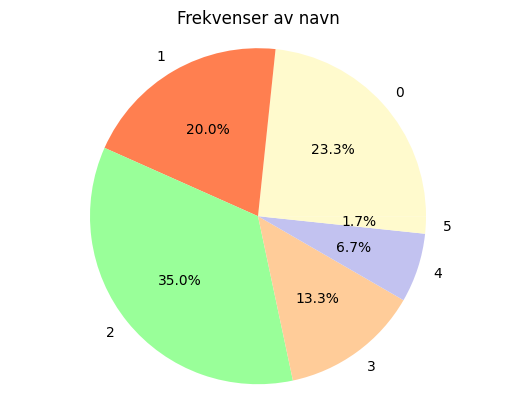

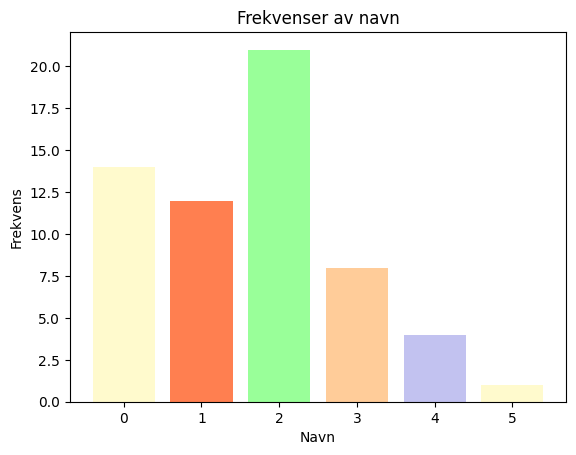

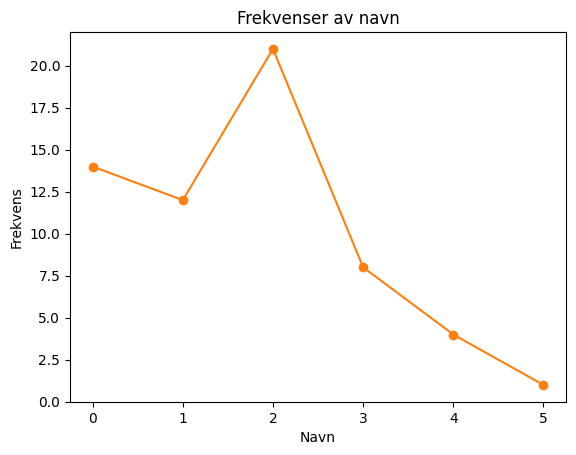

In [5]:
# Søyle, sektor og linjediagram
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["0", "1", "2", "3", "4", "5"] # Bytt utt med dine verdier/tall
frekvenser = [14, 12, 21, 8, 4, 1]

# Fargevalg
farger = ['lemonchiffon','coral','#99ff99','#ffcc99','#c2c2f0']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn")
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Figurtall
import numpy as np
from scipy.optimize import curve_fit

# Eksempel på noen ulike figurtall du kan endre verdiene på
figurtall = [8,12,16]

def lineær_funksjon(x, a, b):
    return a * x + b

def kvadratisk_funksjon(x, a, b, c):
    return a * x**2 + b * x + c

def fjerdegrads_funksjon(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def femtegrads_funksjon(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

def sjettegrads_funksjon(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def potens_funksjon(x, a, b):
    return a * x**b

def eksponential_funksjon(x, a, b):
    return a * np.exp(b * x)

def best_fitting_function(figurtall):
    x_data = np.arange(1, len(figurtall) + 1)
    y_data = np.array(figurtall)

    models = [
        (lineær_funksjon, "f(n) = {:.2f}n + {:.2f}"),
        (kvadratisk_funksjon, "f(n) = {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (fjerdegrads_funksjon, "f(n) = {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (femtegrads_funksjon, "f(n) = {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (sjettegrads_funksjon, "f(n) = {:.2f}n^6 + {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (potens_funksjon, "f(n) = {:.2f}n^{:.2f}"),
        (eksponential_funksjon, "f(n) = {:.2f}e^{:.2f}n")
    ]

    best_model = None
    best_rss = np.inf
    best_params = None
    best_equation = ""

    for func, equation in models:
        try:
            popt, _ = curve_fit(func, x_data, y_data)
            y_fit = func(x_data, *popt)
            rss = np.sum((y_data - y_fit) ** 2)

            if np.all(np.diff(y_fit) >= 0):
                if rss < best_rss:
                    best_rss = rss
                    best_model = func
                    best_params = popt
                    best_equation = equation.format(*popt)

        except Exception as e:
            print(f"Feil med modell {func.__name__}: {e}")
            continue

    return best_model, best_params, best_equation

# Finn den beste tilpassede funksjonen
funksjon, params, funksjon_str = best_fitting_function(figurtall)

if funksjon:
    print(f"Den beste tilpassede funksjonen er: {funksjon_str}")
    # (Endre disse verdiene)
    n_values = [10]
    for figurnummer in n_values:
        figurverdi = funksjon(figurnummer, *params)
        print(f"Figurtallet for figur {figurnummer} er: {int(round(figurverdi))}")
else:
    print("Kunne ikke gjenkjenne en passende funksjon.")

In [ ]:
#Søyle, Sektor og linjediagram men med 2 sett med frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"] # forandre disse verdiene
frekvenser_1 = [3, 6, 5, 5, 3]
frekvenser_2 = [7, 9, 6, 7, 12]

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 for f in frekvenser_2]

# Calculate cumulative frequencies
cumulative_frekvenser_1 = np.cumsum(relative_frekvenser_1)
cumulative_frekvenser_2 = np.cumsum(relative_frekvenser_2)

# Create a table
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [f'{f:.2f}%' for f in cumulative_frekvenser_1], [f'{f:.2f}%' for f in cumulative_frekvenser_2]))
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%',
                  f'{sum(cumulative_frekvenser_1):.2f}%', f'{sum(cumulative_frekvenser_2):.2f}%'))  # Add the row for sum

table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulativ Frekvenser 1', 'Kumulativ Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=14)
table.scale(1, 1.2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=16, y=0.7)  # Adjust the y position of the title


# Show the plot
plt.show()

In [ ]:
# Proporsjonale størrelser
def are_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn proporsjonalitetskonstanten fra det første paret
    k = list_a[0] / list_b[0]

    # Sjekk om forholdet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a / b != k:
            return False, None

    return True, k

# Eksempelbruk
list_a = [0.5, 1.5, 3, 5]
list_b = [11, 33, 66, 110]

result, k = are_proportional(list_b, list_a)
if result:
    print(f"Listene er proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke proporsjonale.")

In [ ]:
# Omvendt proporsjonale størrelser
def are_inverse_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn produktet av det første paret
    k = list_a[0] * list_b[0]

    # Sjekk om produktet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a * b != k:
            return False, None

    return True, k

# Eksempelbruk
list_a = [1, 2, 3]
list_b = [6, 3, 2]

result, k = are_inverse_proportional(list_a, list_b)
if result:
    print(f"Listene er omvendt proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke omvendt proporsjonale.")

# $\color{grey}{\text{Kapittel 4 - Statistikk}}$

In [1]:
#Gjennomsnitt og typetall med Python s.109
from statistics import mean, mode

# Frekvenstabell på formen [(observasjonsverdi, frekvens), ...]
frekvenstabell = [(0,8), (1,5), (2,6), (3,2), (4,3), (5,2), (6,1)]

# Lager ei tom liste
liste = []

# Legger til hver observasjonsverdi x, f ganger i lista
for (x,f) in frekvenstabell:
  liste += f*[x]

# For å se lista vi har lagd kan vi ta 'print(liste)' her
# Skriver ut gjennomsnitt og typetall
print("Gjennomsnittet er", round(mean(liste), 2))
print("Typetallet er", mode(liste))

Gjennomsnittet er 1.89
Typetallet er 0


In [12]:
from statistics import median, mean, mode

# Liste med tallverdier
liste = [19, 25, 42, 17, 56, 33, 23, 45]

# Beregner medianen, gjennomsnittet og typetallet
medianen = round(median(liste),2)
gjennomsnittet = round(mean(liste), 2)
typetallet = round(mode(liste),2)

# Skriver ut resultatene
print("Medianen er", medianen)
print("Gjennomsnittet er", gjennomsnittet)
print("Typetallet er", typetallet)

Medianen er 29.0
Gjennomsnittet er 32.5
Typetallet er 19


In [14]:
# Median i frekvenstabell med Python s.115
from statistics import mean, mode, median

# Frekvenstabell på formen [(observasjonsverdim, frekvens), ...]
frekvenstabell = [(1,2), (2,5), (3,8), (4,7), (5,4), (6,1)]

# Lager ei tom liste
liste = []

# Legger til hver observasjonsverdi x, f ganger i lista 
for (x,f) in frekvenstabell:
  liste += f*[x]

# For å se lista vi har lagd kan vi ta med 'print(liste)' ger
# Skriver ut gjnnomsnitt, typetall og median
print("Gjennomsnittet er", round(mean(liste), 2))
print("Typetallet er ", mode(liste))
print("Medianen er", median(liste))

Gjennomsnittet er 3.33
Typetallet er  3
Medianen er 3


In [31]:
from statistics import mean, pstdev

# Liste med tallverdier
liste = [73, 85, 71, 75, 74, 79, 86, 70, 74, 62, 69]

# Beregner variasjonsbredden
variasjonsbredde = max(liste) - min(liste)

# Beregner gjennomsnittet og standardavviket
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)

# Skriver ut resultatene
print("Variasjonsbredden er", round(variasjonsbredde,2))
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))

Variasjonsbredden er 24
Gjennomsnittet er 74.36
Standardavviket er 6.64


Variasjonsbredden er 11.0
Gjennomsnittet er 196.04
Standardavviket er 4.72


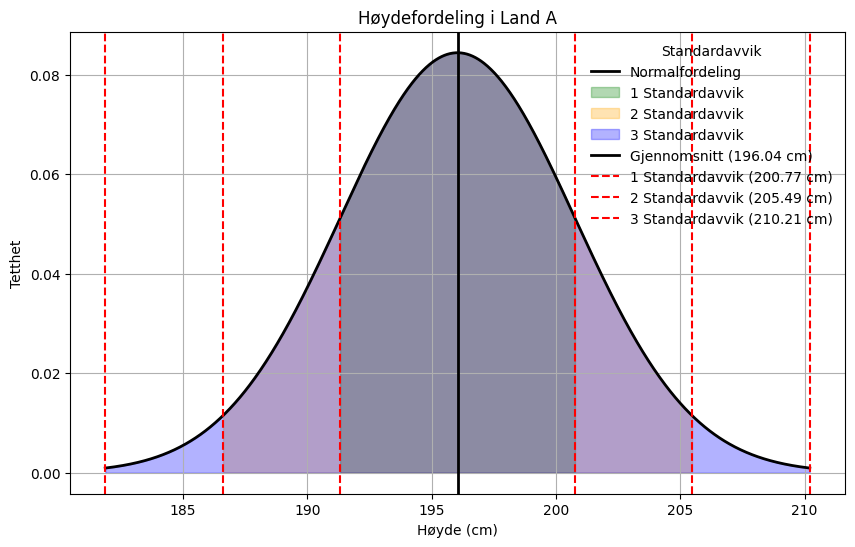


I en normalfordeling vil:
68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.
95.45 % av datasettet være under to standardavvik fra gjennomsnittet.
99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.
99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.


In [9]:
# Beregner standardavviket for en liste med tall
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Eksempeldata for høyder i cm (tenk deg at dette er et utvalg fra basketballlaget)
hoyder = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]

# Beregner gjennomsnittet og standardavviket
gjennomsnitt = np.mean(hoyder)
standardavvik = np.std(hoyder)

# Lager X-verdier som går fra -3 til +3 standardavvik fra gjennomsnittet
x = np.linspace(gjennomsnitt - 3 * standardavvik, gjennomsnitt + 3 * standardavvik, 1000)

# Beregner Y-verdiene for normalfordelingen
y = norm.pdf(x, gjennomsnitt, standardavvik)

# Plotter normalfordelingskurven
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normalfordeling', color='black', lw=2)

# Skravering for 1, 2 og 3 standardavvik (mer distinkte farger)
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 1 * standardavvik) & (x <= gjennomsnitt + 1 * standardavvik),
                 color='green', alpha=0.3, label='1 Standardavvik')
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 2 * standardavvik) & (x <= gjennomsnitt + 2 * standardavvik),
                 color='orange', alpha=0.3, label='2 Standardavvik')
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 3 * standardavvik) & (x <= gjennomsnitt + 3 * standardavvik),
                 color='blue', alpha=0.3, label='3 Standardavvik')

# Legger til vertikale linjer for gjennomsnitt og standardavvikene (til høyre og venstre)
plt.axvline(gjennomsnitt, color='black', linestyle='-', label=f'Gjennomsnitt ({gjennomsnitt:.2f} cm)', lw=2)
for i in range(1, 4):
    # Linjer til høyre for gjennomsnittet
    plt.axvline(gjennomsnitt + i * standardavvik, color='red', linestyle='--', label=f'{i} Standardavvik ({gjennomsnitt + i * standardavvik:.2f} cm)')
    # Linjer til venstre for gjennomsnittet
    plt.axvline(gjennomsnitt - i * standardavvik, color='red', linestyle='--')

# Legger til tittel og etiketter
plt.title("Høydefordeling i Land A")
plt.xlabel("Høyde (cm)")
plt.ylabel("Tetthet")

# Justering av legenden for å sikre god lesbarhet
plt.legend(loc='upper right', frameon=False, title="Standardavvik", fontsize=10)

# Beregner variasjonsbredden
variasjonsbredde = max(hoyder) - min(hoyder)

# Skriver ut resultatene
print("Variasjonsbredden er", round(variasjonsbredde,2))
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))

# Viser grafen
plt.grid(True)
plt.show()

# Legger til prosentverdiene under bildet
print("\nI en normalfordeling vil:")
print("68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.")
print("95.45 % av datasettet være under to standardavvik fra gjennomsnittet.")
print("99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.")
print("99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.")

Variasjonsbredden for Lag A er 11.0
Gjennomsnittet for Lag A er 196.04
Standardavviket for Lag A er 4.72
Variasjonsbredden for Lag B er 8.0
Gjennomsnittet for Lag B er 189.93
Standardavviket for Lag B er 2.59


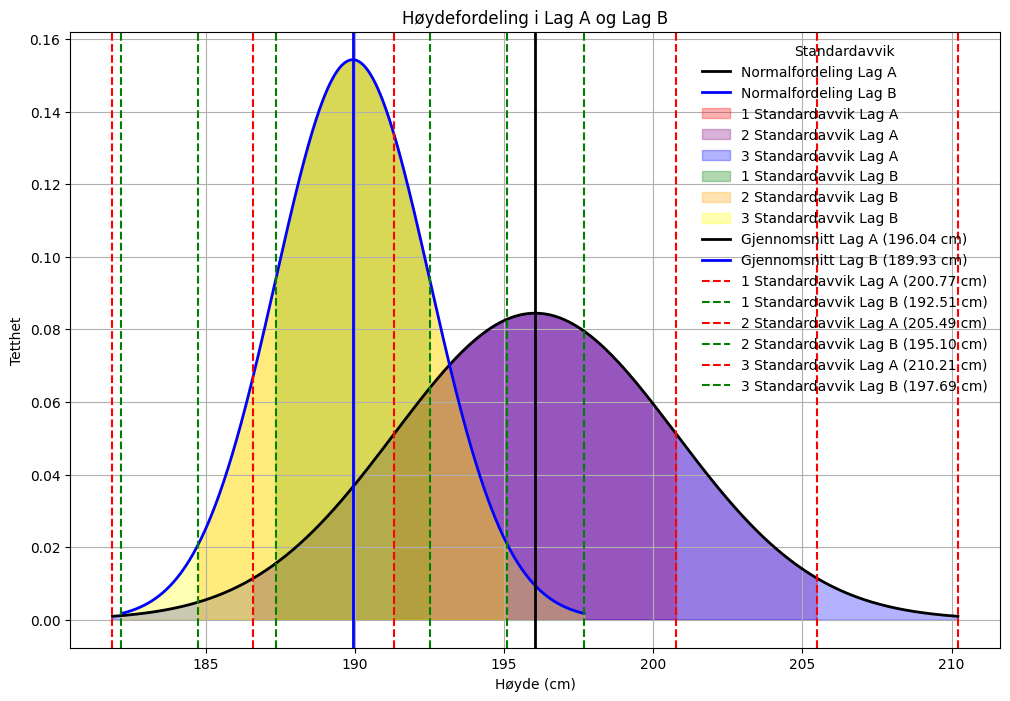


I en normalfordeling vil:
68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.
95.45 % av datasettet være under to standardavvik fra gjennomsnittet.
99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.
99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.


In [10]:
# Beregner standardavviket for en liste med tall med litt andre farger for 2 sett med verdier i samme bilde
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Eksempeldata for høyder i cm for to forskjellige lag
hoyder_lag_a = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]
hoyder_lag_b = [185.2, 190.1, 192.3, 187.5, 193.2, 189.8, 191.4]

# Beregner gjennomsnittet og standardavviket for begge lag
gjennomsnitt_a = np.mean(hoyder_lag_a)
standardavvik_a = np.std(hoyder_lag_a)
gjennomsnitt_b = np.mean(hoyder_lag_b)
standardavvik_b = np.std(hoyder_lag_b)

# Lager X-verdier som går fra -3 til +3 standardavvik fra gjennomsnittet for begge lag
x_a = np.linspace(gjennomsnitt_a - 3 * standardavvik_a, gjennomsnitt_a + 3 * standardavvik_a, 1000)
x_b = np.linspace(gjennomsnitt_b - 3 * standardavvik_b, gjennomsnitt_b + 3 * standardavvik_b, 1000)

# Beregner Y-verdiene for normalfordelingen for begge lag
y_a = norm.pdf(x_a, gjennomsnitt_a, standardavvik_a)
y_b = norm.pdf(x_b, gjennomsnitt_b, standardavvik_b)

# Plotter normalfordelingskurvene
plt.figure(figsize=(12, 8))
plt.plot(x_a, y_a, label='Normalfordeling Lag A', color='black', lw=2)
plt.plot(x_b, y_b, label='Normalfordeling Lag B', color='blue', lw=2)

# Skravering for 1, 2 og 3 standardavvik for Lag A (mer kontrastfylte farger)
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 1 * standardavvik_a) & (x_a <= gjennomsnitt_a + 1 * standardavvik_a),
                 color='red', alpha=0.3, label='1 Standardavvik Lag A')
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 2 * standardavvik_a) & (x_a <= gjennomsnitt_a + 2 * standardavvik_a),
                 color='purple', alpha=0.3, label='2 Standardavvik Lag A')
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 3 * standardavvik_a) & (x_a <= gjennomsnitt_a + 3 * standardavvik_a),
                 color='blue', alpha=0.3, label='3 Standardavvik Lag A')

# Skravering for 1, 2 og 3 standardavvik for Lag B (mer kontrastfylte farger)
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 1 * standardavvik_b) & (x_b <= gjennomsnitt_b + 1 * standardavvik_b),
                 color='green', alpha=0.3, label='1 Standardavvik Lag B')
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 2 * standardavvik_b) & (x_b <= gjennomsnitt_b + 2 * standardavvik_b),
                 color='orange', alpha=0.3, label='2 Standardavvik Lag B')
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 3 * standardavvik_b) & (x_b <= gjennomsnitt_b + 3 * standardavvik_b),
                 color='yellow', alpha=0.3, label='3 Standardavvik Lag B')

# Legger til vertikale linjer for gjennomsnitt og standardavvikene for begge lag
plt.axvline(gjennomsnitt_a, color='black', linestyle='-', label=f'Gjennomsnitt Lag A ({gjennomsnitt_a:.2f} cm)', lw=2)
plt.axvline(gjennomsnitt_b, color='blue', linestyle='-', label=f'Gjennomsnitt Lag B ({gjennomsnitt_b:.2f} cm)', lw=2)
for i in range(1, 4):
    # Linjer til høyre for gjennomsnittet
    plt.axvline(gjennomsnitt_a + i * standardavvik_a, color='red', linestyle='--', label=f'{i} Standardavvik Lag A ({gjennomsnitt_a + i * standardavvik_a:.2f} cm)')
    plt.axvline(gjennomsnitt_b + i * standardavvik_b, color='green', linestyle='--', label=f'{i} Standardavvik Lag B ({gjennomsnitt_b + i * standardavvik_b:.2f} cm)')
    # Linjer til venstre for gjennomsnittet
    plt.axvline(gjennomsnitt_a - i * standardavvik_a, color='red', linestyle='--')
    plt.axvline(gjennomsnitt_b - i * standardavvik_b, color='green', linestyle='--')

# Legger til tittel og etiketter
plt.title("Høydefordeling i Lag A og Lag B")
plt.xlabel("Høyde (cm)")
plt.ylabel("Tetthet")

# Justering av legenden for å sikre god lesbarhet
plt.legend(loc='upper right', frameon=False, title="Standardavvik", fontsize=10)

# Beregner variasjonsbredden for begge lag
variasjonsbredde_a = max(hoyder_lag_a) - min(hoyder_lag_a)
variasjonsbredde_b = max(hoyder_lag_b) - min(hoyder_lag_b)

# Skriver ut resultatene
print("Variasjonsbredden for Lag A er", round(variasjonsbredde_a, 2))
print("Gjennomsnittet for Lag A er", round(gjennomsnitt_a, 2))
print("Standardavviket for Lag A er", round(standardavvik_a, 2))
print("Variasjonsbredden for Lag B er", round(variasjonsbredde_b, 2))
print("Gjennomsnittet for Lag B er", round(gjennomsnitt_b, 2))
print("Standardavviket for Lag B er", round(standardavvik_b, 2))

# Viser grafen
plt.grid(True)
plt.show()

# Legger til prosentverdiene under bildet
print("\nI en normalfordeling vil:")
print("68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.")
print("95.45 % av datasettet være under to standardavvik fra gjennomsnittet.")
print("99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.")
print("99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.")

Shapiro-Wilk-test for Lag A: Statistikk = 0.6672091935462496 , p-verdi = 0.0016085852704492696
Shapiro-Wilk-test for Lag B: Statistikk = 0.949353003633923 , p-verdi = 0.7238055821168665
Kolmogorov-Smirnov-test for Lag A: Statistikk = 0.3903484122449761 , p-verdi = 0.1797071307190219
Kolmogorov-Smirnov-test for Lag B: Statistikk = 0.19445546452349927 , p-verdi = 0.911304389596775
Lag A: Dataene er ikke normalfordelte (Shapiro-Wilk-test).
Lag B: Dataene er normalfordelte (Shapiro-Wilk-test).
Lag A: Dataene er normalfordelte (Kolmogorov-Smirnov-test).
Lag B: Dataene er normalfordelte (Kolmogorov-Smirnov-test).


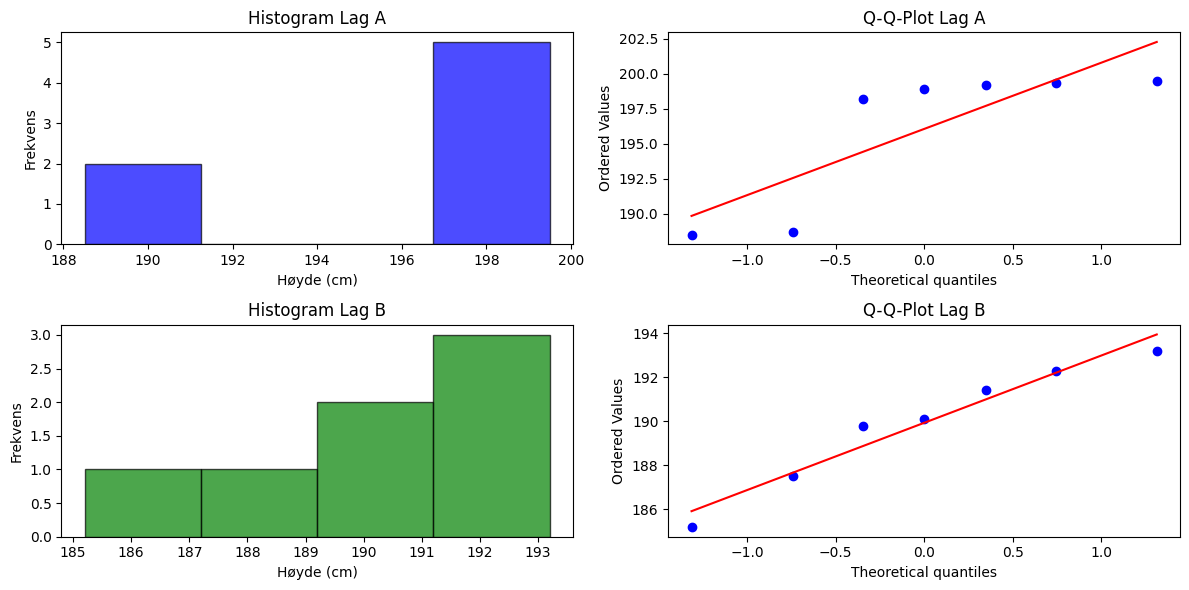

In [12]:
#Denne koden utfører følgende:

#Importerer nødvendige biblioteker.
#Definerer eksempeldata for høyder i cm for to forskjellige lag.
#Utfører Shapiro-Wilk-testen for begge datasettene.
#Utfører Kolmogorov-Smirnov-testen for begge datasettene.
#Skriver ut resultatene av testene.
#Tolker resultatene basert på en signifikansnivå (alpha) på 0.05.
# Plotter histogrammer og Q-Q-plots for begge datasettene for å visuelt inspisere normalfordelingen.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, kstest, norm

# Eksempeldata for høyder i cm for to forskjellige lag
hoyder_lag_a = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]
hoyder_lag_b = [185.2, 190.1, 192.3, 187.5, 193.2, 189.8, 191.4]

# Shapiro-Wilk-test
shapiro_test_a = shapiro(hoyder_lag_a)
shapiro_test_b = shapiro(hoyder_lag_b)

# Kolmogorov-Smirnov-test
kstest_a = kstest(hoyder_lag_a, 'norm', args=(np.mean(hoyder_lag_a), np.std(hoyder_lag_a)))
kstest_b = kstest(hoyder_lag_b, 'norm', args=(np.mean(hoyder_lag_b), np.std(hoyder_lag_b)))

# Resultater
print("Shapiro-Wilk-test for Lag A: Statistikk =", shapiro_test_a.statistic, ", p-verdi =", shapiro_test_a.pvalue)
print("Shapiro-Wilk-test for Lag B: Statistikk =", shapiro_test_b.statistic, ", p-verdi =", shapiro_test_b.pvalue)
print("Kolmogorov-Smirnov-test for Lag A: Statistikk =", kstest_a.statistic, ", p-verdi =", kstest_a.pvalue)
print("Kolmogorov-Smirnov-test for Lag B: Statistikk =", kstest_b.statistic, ", p-verdi =", kstest_b.pvalue)

# Tolkning av resultater
alpha = 0.05
if shapiro_test_a.pvalue > alpha:
    print("Lag A: Dataene er normalfordelte (Shapiro-Wilk-test).")
else:
    print("Lag A: Dataene er ikke normalfordelte (Shapiro-Wilk-test).")

if shapiro_test_b.pvalue > alpha:
    print("Lag B: Dataene er normalfordelte (Shapiro-Wilk-test).")
else:
    print("Lag B: Dataene er ikke normalfordelte (Shapiro-Wilk-test).")

if kstest_a.pvalue > alpha:
    print("Lag A: Dataene er normalfordelte (Kolmogorov-Smirnov-test).")
else:
    print("Lag A: Dataene er ikke normalfordelte (Kolmogorov-Smirnov-test).")

if kstest_b.pvalue > alpha:
    print("Lag B: Dataene er normalfordelte (Kolmogorov-Smirnov-test).")
else:
    print("Lag B: Dataene er ikke normalfordelte (Kolmogorov-Smirnov-test).")

# Plot histogrammer og Q-Q-plots for Lag A
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(hoyder_lag_a, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram Lag A')
plt.xlabel('Høyde (cm)')
plt.ylabel('Frekvens')

plt.subplot(2, 2, 2)
stats.probplot(hoyder_lag_a, dist="norm", plot=plt)
plt.title('Q-Q-Plot Lag A')

# Plot histogrammer og Q-Q-plots for Lag B
plt.subplot(2, 2, 3)
plt.hist(hoyder_lag_b, bins='auto', alpha=0.7, color='green', edgecolor='black')
plt.title('Histogram Lag B')
plt.xlabel('Høyde (cm)')
plt.ylabel('Frekvens')

plt.subplot(2, 2, 4)
stats.probplot(hoyder_lag_b, dist="norm", plot=plt)
plt.title('Q-Q-Plot Lag B')

# Juster layout og vis plottet
plt.tight_layout()
plt.show()

Shapiro-Wilk-test for Lag A: Statistikk = 0.6672091935462496 , p-verdi = 0.0016085852704492696
Shapiro-Wilk-test for Lag B: Statistikk = 0.949353003633923 , p-verdi = 0.7238055821168665
Kolmogorov-Smirnov-test for Lag A: Statistikk = 0.3903484122449761 , p-verdi = 0.1797071307190219
Kolmogorov-Smirnov-test for Lag B: Statistikk = 0.19445546452349927 , p-verdi = 0.911304389596775
Lag A: Dataene er ikke normalfordelte (Shapiro-Wilk-test).
Lag B: Dataene er normalfordelte (Shapiro-Wilk-test).
Lag A: Dataene er normalfordelte (Kolmogorov-Smirnov-test).
Lag B: Dataene er normalfordelte (Kolmogorov-Smirnov-test).


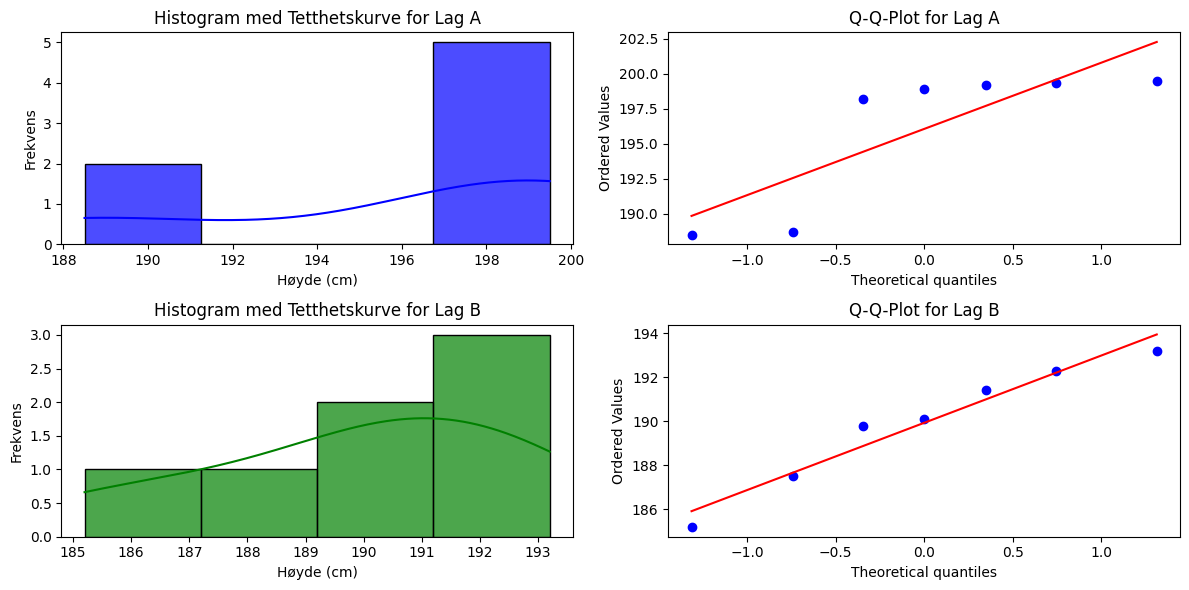

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importerer seaborn for tetthetskurver
import scipy.stats as stats
from scipy.stats import shapiro, kstest, norm

# Eksempeldata for høyder i cm for to forskjellige lag
hoyder_lag_a = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]
hoyder_lag_b = [185.2, 190.1, 192.3, 187.5, 193.2, 189.8, 191.4]

# Shapiro-Wilk-test
shapiro_test_a = shapiro(hoyder_lag_a)
shapiro_test_b = shapiro(hoyder_lag_b)

# Kolmogorov-Smirnov-test
kstest_a = kstest(hoyder_lag_a, 'norm', args=(np.mean(hoyder_lag_a), np.std(hoyder_lag_a)))
kstest_b = kstest(hoyder_lag_b, 'norm', args=(np.mean(hoyder_lag_b), np.std(hoyder_lag_b)))

# Resultater
print("Shapiro-Wilk-test for Lag A: Statistikk =", shapiro_test_a.statistic, ", p-verdi =", shapiro_test_a.pvalue)
print("Shapiro-Wilk-test for Lag B: Statistikk =", shapiro_test_b.statistic, ", p-verdi =", shapiro_test_b.pvalue)
print("Kolmogorov-Smirnov-test for Lag A: Statistikk =", kstest_a.statistic, ", p-verdi =", kstest_a.pvalue)
print("Kolmogorov-Smirnov-test for Lag B: Statistikk =", kstest_b.statistic, ", p-verdi =", kstest_b.pvalue)

# Tolkning av resultater
alpha = 0.05
if shapiro_test_a.pvalue > alpha:
    print("Lag A: Dataene er normalfordelte (Shapiro-Wilk-test).")
else:
    print("Lag A: Dataene er ikke normalfordelte (Shapiro-Wilk-test).")

if shapiro_test_b.pvalue > alpha:
    print("Lag B: Dataene er normalfordelte (Shapiro-Wilk-test).")
else:
    print("Lag B: Dataene er ikke normalfordelte (Shapiro-Wilk-test).")

if kstest_a.pvalue > alpha:
    print("Lag A: Dataene er normalfordelte (Kolmogorov-Smirnov-test).")
else:
    print("Lag A: Dataene er ikke normalfordelte (Kolmogorov-Smirnov-test).")

if kstest_b.pvalue > alpha:
    print("Lag B: Dataene er normalfordelte (Kolmogorov-Smirnov-test).")
else:
    print("Lag B: Dataene er ikke normalfordelte (Kolmogorov-Smirnov-test).")

# Plot histogrammer og Q-Q-plots for Lag A
plt.figure(figsize=(12, 6))

# Histogram med tetthetskurve for Lag A
plt.subplot(2, 2, 1)
sns.histplot(hoyder_lag_a, kde=True, color='blue', bins='auto', alpha=0.7)  # Bruker sns.histplot for tetthetskurve
plt.title('Histogram med Tetthetskurve for Lag A')
plt.xlabel('Høyde (cm)')
plt.ylabel('Frekvens')

# Q-Q-Plot for Lag A
plt.subplot(2, 2, 2)
stats.probplot(hoyder_lag_a, dist="norm", plot=plt)
plt.title('Q-Q-Plot for Lag A')

# Plot histogrammer og Q-Q-plots for Lag B
plt.subplot(2, 2, 3)
sns.histplot(hoyder_lag_b, kde=True, color='green', bins='auto', alpha=0.7)  # Bruker sns.histplot for tetthetskurve
plt.title('Histogram med Tetthetskurve for Lag B')
plt.xlabel('Høyde (cm)')
plt.ylabel('Frekvens')

# Q-Q-Plot for Lag B
plt.subplot(2, 2, 4)
stats.probplot(hoyder_lag_b, dist="norm", plot=plt)
plt.title('Q-Q-Plot for Lag B')

# Juster layout for bedre plass og vis plottet
plt.tight_layout()
plt.show()

In [10]:
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(0,1), (1,1), (2,16), (3,8), (4,1), (5,0), (6,1), (7,0), (8,0), (9,1)]

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

Gjennomsnittet er 2.62
Standardavviket er 1.56
Variansen er 2.53


In [2]:
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(4,2), (5,4), (5.5,2), (6,3), (7,11), (7.5,3), (8,2), (9, 1)]

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

Gjennomsnittet er 6.57
Standardavviket er 1.27
Variansen er 1.67


Total frekvenser: 218


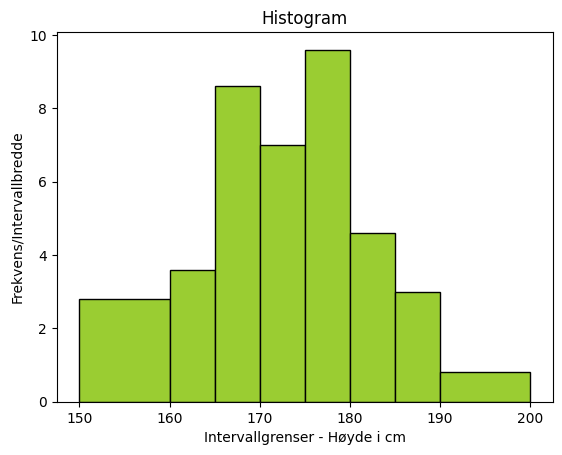

In [6]:
import matplotlib.pyplot as plt

# Definer dataene
intervaller = [150, 160, 165, 170, 175, 180, 185, 190, 200]  # Intervallgrensene
frekvenser = [28, 18, 43, 35, 48, 23, 15, 8]  # Frekvensene

# Regn ut søylehøyder
soyle_hoyder = []
for i in range(len(frekvenser)):
    intervall_bredde = intervaller[i+1] - intervaller[i]
    soyle_hoyder.append(frekvenser[i] / intervall_bredde)

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Total frekvenser: {total_frekvenser}")

# Plott histogrammet
plt.bar(intervaller[:-1], soyle_hoyder, width=[intervaller[i+1] - intervaller[i] for i in range(len(frekvenser))], align='edge', edgecolor='black', color='yellowgreen')

# Sett label på akser og tittel
plt.xlabel('Intervallgrenser - Høyde i cm')
plt.ylabel('Frekvens/Intervallbredde')
plt.title('Histogram')

# Vis plottet
plt.show()

Gjennomsnittet er: 64.8
Medianen er: 62.2


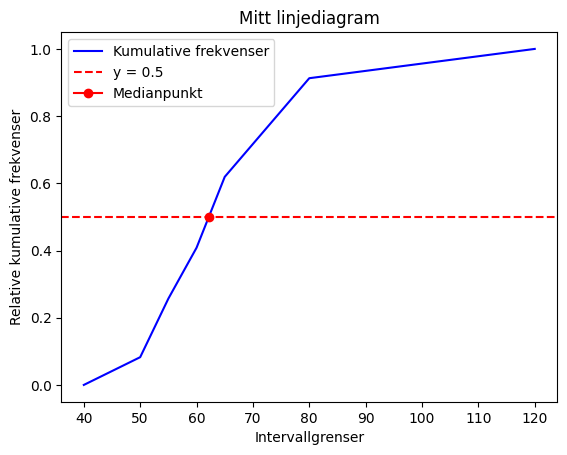

In [3]:
# Finne median og gjennomsnitt i klassedelt materiale
import matplotlib.pyplot as plt

# Intervallgrenser og frekvenser
intervaller = [40, 50, 55, 60, 65, 80, 120]   # Endre disse verdiene til oppgaven din
frekvenser = [18, 38, 33, 46, 64, 19]         # Endre disse verdiene til oppgaven din

# Finn midtpunktene
midtpunkter = [(intervaller[i] + intervaller[i+1]) / 2 for i in range(len(intervaller)-1)]

# Regn ut gjennomsnittet
total = sum([midtpunkter[i] * frekvenser[i] for i in range(len(midtpunkter))])
gjennomsnitt = total / sum(frekvenser)
print("Gjennomsnittet er:", round(gjennomsnitt, 1))

# Regn ut medianen
n = sum(frekvenser)
midten = n / 2
cumulative_freq = 0
median = None
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    if cumulative_freq >= midten:
        # Interpoler for å finne medianen nøyaktig
        if cumulative_freq == midten:
            median = (midtpunkter[i] + midtpunkter[i+1]) / 2
        else:
            median = midtpunkter[i]
        break

# Plot de relative kumulative frekvensene mot intervallgrensene
cumulative_freqs = []
cumulative_freq = 0
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    cumulative_freqs.append(cumulative_freq)

rel_cumulative_freq = [0] + [cf / sum(frekvenser) for cf in cumulative_freqs]
plt.plot(intervaller, rel_cumulative_freq, label='Kumulative frekvenser', color='blue', linestyle='solid')
plt.axhline(y=0.5, color='red', linestyle='dashed', label='y = 0.5')

# Finn hvor medianen krysser den blå linjen og marker det punktet
for i in range(len(rel_cumulative_freq)-1):
    if rel_cumulative_freq[i] <= 0.5 and rel_cumulative_freq[i+1] >= 0.5:
        x1, y1 = intervaller[i], rel_cumulative_freq[i]
        x2, y2 = intervaller[i+1], rel_cumulative_freq[i+1]
        m = (y2 - y1) / (x2 - x1)
        x = x1 + (0.5 - y1) / m
        plt.plot(x, 0.5, marker='o', color='red', label='Medianpunkt')
        break

# Legg til en overskrift
plt.title("Mitt linjediagram")
plt.xlabel("Intervallgrenser")
plt.ylabel("Relative kumulative frekvenser")
plt.legend()
print("Medianen er:", round(x, 1))
plt.show()

In [40]:
#Variasjonsbredde, standardavvik, median, gjennomsnitt
import numpy as np
import matplotlib.pyplot as plt

# Guttene sin spilletid i minutter
guttene_spilletid = np.array([18, 21, 26, 33, 33, 41, 48, 55, 64, 70, 112, 125, 146])

# a) Variasjonsbredde
variasjonsbredde = np.max(guttene_spilletid) - np.min(guttene_spilletid)
print(f"Variasjonsbredde: {variasjonsbredde} minutter")

# b) Standardavvik
gjennomsnitt = np.average(guttene_spilletid)
standardavvik = np.sqrt(np.average((guttene_spilletid - gjennomsnitt) ** 2))
print(f"Standardavvik: {standardavvik:.2f} minutter")

# c) Sammenligning med jentegjengen
jentegjeng_standardavvik = 60
if standardavvik > jentegjeng_standardavvik:
    sammenligning = "Guttene har større variasjon i spilletiden."
else:
    sammenligning = "Guttene og jentene har omtrent samme variasjon i spilletiden."

print(sammenligning)

# d) Antall elever i undersøkelsen
frekvenser = np.array([6, 41, 223, 113, 47, 8])
antall_elever = np.sum(frekvenser)
print(f"Antall elever: {antall_elever}")

# e) Medianens klasse
klasse_midtpunkter = np.array([10, 30, 50, 70, 90, 125])
median_klasse = klasse_midtpunkter[np.argmax(frekvenser)]
print(f"Medianens klasse: [{median_klasse-10}, {median_klasse+10})")

# f) Gjennomsnitt i det grupperte materialet
gjennomsnitt_gruppert = np.sum(klasse_midtpunkter * frekvenser) / antall_elever
print(f"Gjennomsnitt i det grupperte materialet: {gjennomsnitt_gruppert:.2f} minutter")


Variasjonsbredde: 128 minutter
Standardavvik: 40.06 minutter
Guttene og jentene har omtrent samme variasjon i spilletiden.
Antall elever: 438
Medianens klasse: [40, 60)
Gjennomsnitt i det grupperte materialet: 58.40 minutter


# $\color{lightblue}{\text{Kapittel 5 - Lineære funksjoner}}$

In [1]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 0
y1 = -2
x2 = 1
y2 = 0

slope = (y2 - y1) / (x2 - x1)

print("stigningstall = ", slope)

stigningstall =  2.0


In [2]:
#Tabell med (x,y) verdier

x = 5
y = 1*x -2 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 1*x -2  # Funksjonen
    print(x, "\t", y)

Når x-verdien er 5 , er y-verdien lik 3
x 	 y
0 	 -2
1 	 -1
2 	 0
3 	 1
4 	 2
5 	 3
6 	 4
7 	 5
8 	 6
9 	 7
10 	 8


In [26]:
# En annen måte å gjøre det samme på som forrige program

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

Når x-verdien er 5 , er f(x) - verdien: 23
Når x-verdien er 0 er f(x) - verdien:	 3
Når x-verdien er 1 er f(x) - verdien:	 7
Når x-verdien er 2 er f(x) - verdien:	 11
Når x-verdien er 3 er f(x) - verdien:	 15
Når x-verdien er 4 er f(x) - verdien:	 19
Når x-verdien er 5 er f(x) - verdien:	 23
Når x-verdien er 6 er f(x) - verdien:	 27
Når x-verdien er 7 er f(x) - verdien:	 31
Når x-verdien er 8 er f(x) - verdien:	 35
Når x-verdien er 9 er f(x) - verdien:	 39
Når x-verdien er 10 er f(x) - verdien:	 43


In [27]:
# Øvingsoppgave 5.159 s.325
xstart = 0
xslutt = 10
print("x \t y")
for x in range(xstart, xslutt):
  y = 4*x - 5
  print(x, "\t", y)

x 	 y
0 	 -5
1 	 -1
2 	 3
3 	 7
4 	 11
5 	 15
6 	 19
7 	 23
8 	 27
9 	 31


y =  -2.0 x +  4.0


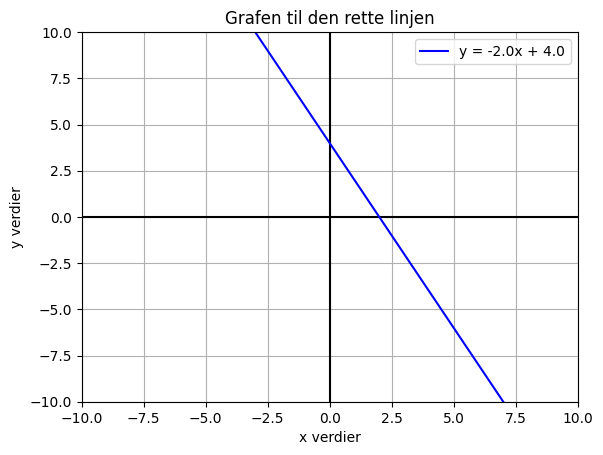

In [16]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

# Skriv inn datapunktene (x1,y1) og (x2,y2) du får oppgitt
x1 = 0 # Bytt denne verdien
y1 = 4 # Bytt denne verdien
x2 = 2 # Bytt denne verdien
y2 = 0 # Bytt denne verdien

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1) # Stigningtsallet m
b = y1 - m * x1 # Konstantleddet b
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # Vindu størrelse
plt.plot([xmin, xmax], [0, 0], 'k')  # svar x akse
plt.plot([0, 0], [ymin, ymax], 'k')  # svart y akse

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("Grafen til den rette linjen")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'b', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

Hvor mange funksjoner vil du plotte?  2
Tast inn funksjon 1 (i formatet mx+b):  2x+3
Tast inn funksjon 2 (i formatet mx+b):  2x-3
Har du noen dummy data du vil legge til? (ja/nei)  nei


Skjæringspunktet med y-aksen for funksjon f(x) = 2.0x + 3.0 er (0, 3.0)
Skjæringspunktet med x-aksen for funksjon f(x) = 2.0x + 3.0 er (-1.5, 0)
Skjæringspunktet med y-aksen for funksjon g(x) = 2.0x + -3.0 er (0, -3.0)
Skjæringspunktet med x-aksen for funksjon g(x) = 2.0x + -3.0 er (--1.5, 0)


Hva vil du kalle x-aksen?  år
Hva vil du kalle y-aksen?  Penger
Hva vil du kalle plottet?  Penger per år


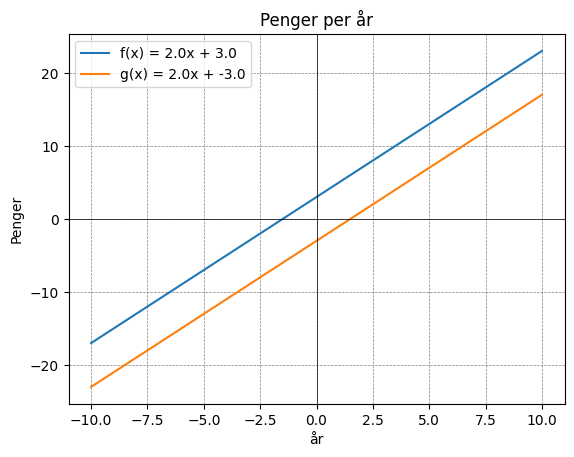

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()

Linje 1: y = 1.0x + 3.0
Linje 2: y = 2.0x + -2.0
Linje 3: y = -2.0x + 4.0


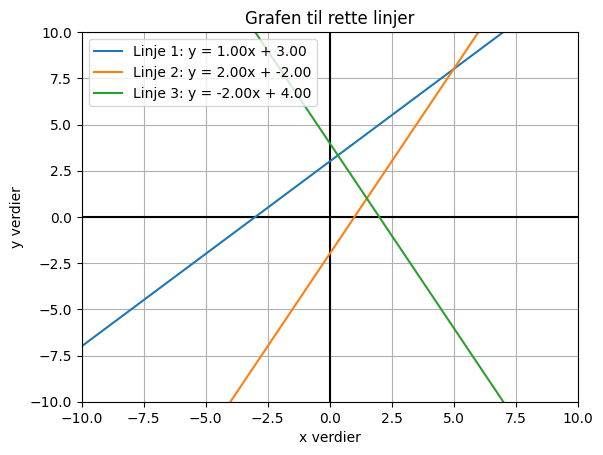

In [2]:
# Kode for flere rette linjer i samme koordinatsystem
import matplotlib.pyplot as plt
 
# Funksjon for å beregne ligningen til en linje
def linje_koeffisienter(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m, b
 
# Definer grensene for grafen
xmin, xmax = -10, 10
ymin, ymax = -10, 10
 
# Liste over linjepunkter (Legg inn eller fjern)
linjer = [
    (-3, 0, 0, 3),  # Første linje
    (0, -2, 1, 0),  # Andre linje
    (0, 4, 2, 0),  # Tredje linje
 
]
 
# Opprett figur og akse
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # Vinduets størrelse
plt.plot([xmin, xmax], [0, 0], 'k')  # Svart x-akse
plt.plot([0, 0], [ymin, ymax], 'k')  # Svart y-akse
ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("Grafen til rette linjer")
ax.grid(True)
 
# Legg til linjene i plottet
for i, (x1, y1, x2, y2) in enumerate(linjer):
    m, b = linje_koeffisienter(x1, y1, x2, y2)
    print(f"Linje {i+1}: y = {m}x + {b}")
    y3 = m * xmin + b
    y4 = m * xmax + b
    plt.plot([xmin, xmax], [y3, y4], label=f'Linje {i+1}: y = {m:.2f}x + {b:.2f}')
 
# Vis legenden og plottet
plt.legend()
plt.show()

a verdien er 11.55
b verdien er 128.2
y(x) = ax + b
Lineær funksjon: y(x) = 11.55 * x + 128.2

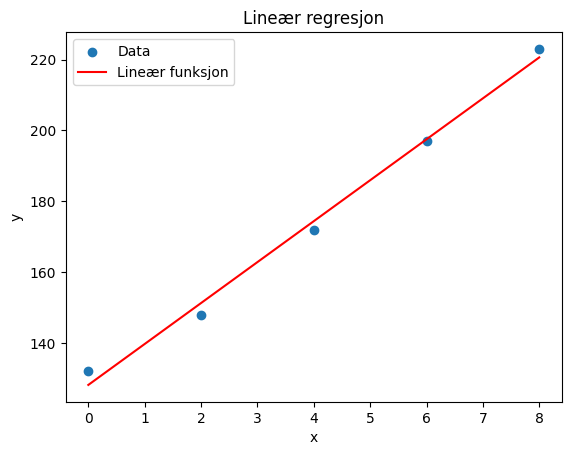

In [ ]:
# Lineær regresjon med dummy data
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]    # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")


Hvor mange funksjoner vil du plotte?  1
Tast inn funksjon 1 (i formatet mx+b):  2x+3
Har du noen dummy data du vil legge til? (ja/nei)  nei


Skjæringspunktet med y-aksen for funksjon f(x) = 2.0x + 3.0 er (0, 3.0)
Skjæringspunktet med x-aksen for funksjon f(x) = 2.0x + 3.0 er (-1.5, 0)


Hva vil du kalle x-aksen?  år
Hva vil du kalle y-aksen?  penger
Hva vil du kalle plottet?  Tema


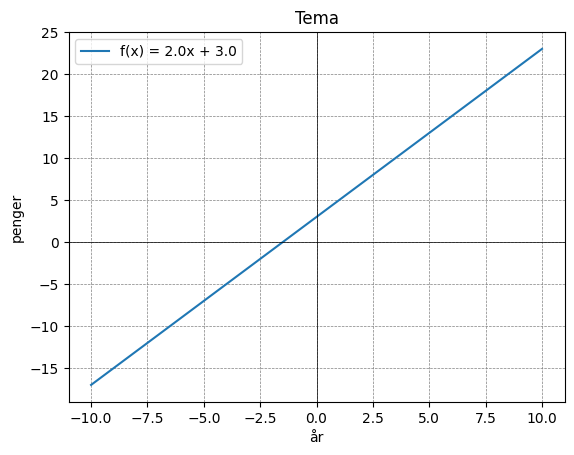

In [29]:
#Graftegning (Rette linjer) ved hjelp av Python og skjæringspunkter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()


y =  1.25 x +  0.5


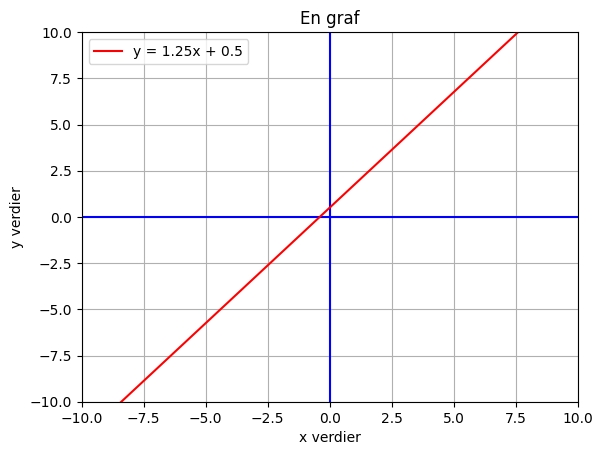

In [1]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

x1 = 2
y1 = 3
x2 = 6
y2 = 8

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # window size
plt.plot([xmin, xmax], [0, 0], 'b')  # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b')  # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'r', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

In [2]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 1
y1 = 7
x2 = 2
y2 = 10

slope = (y2 - y1) / (x2 - x1)

print("slope = ", slope)

slope =  3.0


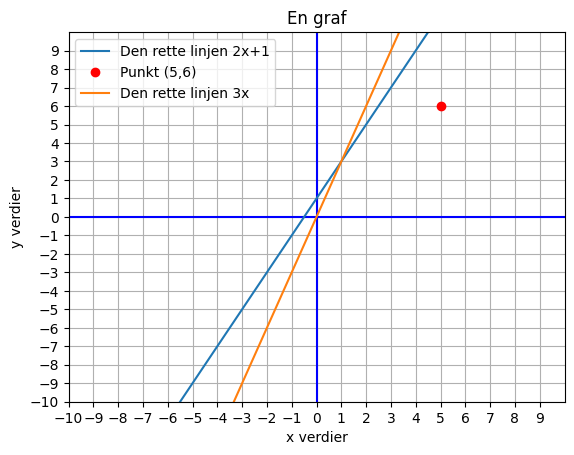

In [3]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

ax.set_xticks(np.arange(xmin, xmax, 1))
ax.set_yticks(np.arange(ymin, ymax, 1))

y = 2*x +1
plt.plot(x,y, label='Den rette linjen 2x+1')
plt.plot([5],[6], 'ro', label='Punkt (5,6)')
plt.plot(x,3*x, label='Den rette linjen 3x')
plt.legend()
plt.show()

# $\color{coral}{\text{Kapittel 6 - Matematiske modeller}}$

Vekstfarten/Stigningstallet a er 1.47
Konstantleddet/skjæringspunktet med y-aksen b er 312.57
y(x) = ax + b
Lineær funksjon: y(x) = 1.47 * x + 312.57


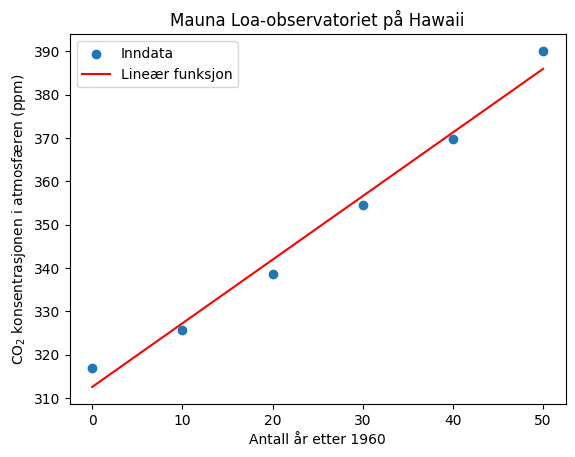

y-verdi for x=60.00: 400.65
x-verdi for y=500.00: 127.68


In [1]:
# Lineær regresjon med dummy data
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 10, 20, 30, 40, 50]                          # Bytt ut tallene slik at de passer til din oppgave
y = [316.9, 325.7, 338.7, 354.5, 369.7, 390.1]       # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print("Vekstfarten/Stigningstallet a er {:.2f}".format(a))
print("Konstantleddet/skjæringspunktet med y-aksen b er {:.2f}".format(b))


# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.2f}".format(a, b))                       # Bytt tall for antall desimaler :)  

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Inndata')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('Antall år etter 1960')                                                     # Navn på x-aksen
plt.ylabel('CO$_2$ konsentrasjonen i atmosfæren (ppm)')                                   # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Mauna Loa-observatoriet på Hawaii")                                         # Navn på overskrift

plt.show()

# Finn y-verdien når x = ...
x_val = 60
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val:.2f}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 500
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val:.2f}: {x_val:.2f}")

Eksponentiell funksjon: y(x) = 313.8 * 1.004^x
Vekstfaktor: 1.004
Prosentvis endring i hele dataperioden per x-enhet er 0.42 %


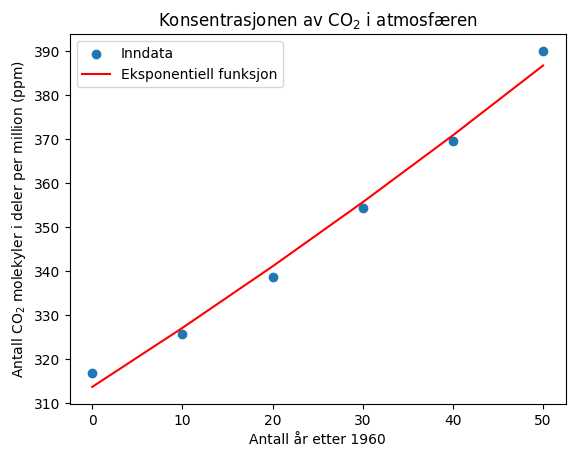

y-verdi for x=60: 403.32
x-verdi for y=500.00: 111.34


In [5]:
# Eksponentialregresjon med dummy data - kode
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = np.array([0, 10, 20, 30, 40, 50])                 # Bytt ut tallene med de som passer i oppgaven din
y = np.array([316.9, 325.7, 338.7, 354.5, 369.7, 390.1])      # Bytt ut tallene med de som passer i oppgaven din

# Utfør eksponentiell regresjon ved hjelp av np.polyfit
log_y = np.log(y)
coeffs = np.polyfit(x, log_y, 1)
a = np.exp(coeffs[1])
b = np.exp(coeffs[0])

# Skriv ut eksponentiell funksjon
print(f"Eksponentiell funksjon: y(x) = {a:.1f} * {b:.3f}^x") # tallene kan byttes ut med antall desimaler i svaret ditt

# Beregn vekstfaktor og prosentvis økning/minking
vekstfaktor = b
prosentvis_endring = (vekstfaktor - 1) * 100

print(f"Vekstfaktor: {vekstfaktor:.3f}")
print(f"Prosentvis endring i hele dataperioden per x-enhet er {prosentvis_endring:.2f} %")

# Plot datasettet og eksponentiell funksjon
plt.scatter(x, y, label='Inndata')
plt.plot(x, a * b ** x, label='Eksponentiell funksjon', color="r")
plt.xlabel('Antall år etter 1960')                      # Navn på x-aksen
plt.ylabel('Antall CO$_2$ molekyler i deler per million (ppm)')                      # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Konsentrasjonen av CO$_2$ i atmosfæren")           # Forandre navn på overskriften hvis du vil $_2$ for senket skrift og $^2$ for hevet
plt.show()

# Finn y-verdien når x = … 
x_val = 60
y_val = a * (b ** x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = ...
y_val = 500
x_val = np.log(y_val/a) / np.log(b)
print(f"x-verdi for y={y_val:.2f}: {x_val:.2f}")

In [17]:
# Oppgave 6.41 Eksponentialfunksjon på antall innbyggere etter x-antall år og dato
import numpy as np
from datetime import datetime

# Funksjon for å beregne innbyggertallet
def beregn_innbyggertall(start_aar, start_innbyggertall, vekstfaktor, aar):
    x = aar - start_aar
    return start_innbyggertall * (vekstfaktor ** x)

# Funksjon for å beregne innbyggertallet på en bestemt dato
def beregn_innbyggertall_dato(start_aar, start_innbyggertall, vekstfaktor, dato):
    start_dato = datetime(start_aar, 1, 1)
    dager_forskjell = (dato - start_dato).days
    aar_forskjell = dager_forskjell / 365                                                              # Gjennomsnittlig antall dager i et år
    return start_innbyggertall * (vekstfaktor ** aar_forskjell)

# Startår og innbyggertall
start_aar = 2017                                                                                           # Start år
start_innbyggertall = 34066                                                                                # Start inbyggertall
vekstfaktor = 1.013                                                                                        # Vekstfaktor på 1.3% per år

# Funksjonsuttrykket f(x)
print(f"Funksjonsuttrykket f(x) = {start_innbyggertall} * {vekstfaktor}^x")

# Beregn innbyggertallet for en bestemt dato
onsket_dato = datetime(2020, 10, 1)                                                                         # Bytt ut med ønsket (år, måned og dato)
innbyggertall_dato = beregn_innbyggertall_dato(start_aar, start_innbyggertall, vekstfaktor, onsket_dato)
print(f"Innbyggertallet {onsket_dato.strftime('%d. %B %Y')} var {innbyggertall_dato:.0f}")

Funksjonsuttrykket f(x) = 34066 * 1.013^x
Innbyggertallet 01. October 2020 var 35757


Polynomfunksjonen for grad 3:
7.8571 - 0.9286x + 0.2277x^2 - 0.0078x^3


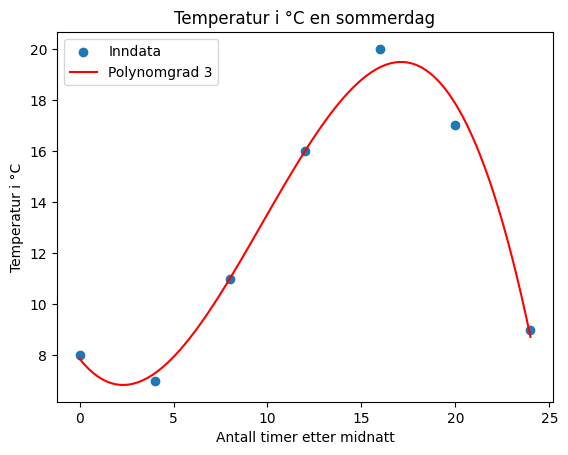

y-verdien når x = 16.00 er 19.29
x-verdiene når y = 12 er [22.96, 8.81, -2.62]
Stigningstallet mellom punktene (1.00, -4.85) og (20.00, 5.86) er: 0.56
Stigningstallet til tangenten i punktet (6.00, -3.21) er: 0.96
Nullpunkter innenfor intervallet (0, 24) er: [22.96, 8.81]
Ekstremalpunkter innenfor intervallet (0, 24) er: [(17.11, 7.49), (2.32, -5.17)]


In [11]:
# Polynomregresjon med bruk av dummy Data hvor du selv velger polynomgrad
import numpy as np
import matplotlib.pyplot as plt

# Dummy data
x = np.array([0, 4, 8, 12, 16, 20, 24])  # Eksempel data
y = np.array([8, 7, 11, 16, 20, 17, 9])  # Eksempel data

# Funksjon for å beregne polynomregresjon og la brukeren velge grad
def polynomial_regression(x, y, n):
    # Beregn polynomkoeffisientene for valgt grad
    coefficients = np.polyfit(x, y, n)
    p = np.poly1d(coefficients)
    
    # Skriv ut polynomfunksjonen med ^ tegn og riktig rekkefølge
    poly_str = " + ".join([f"{coeff:.4f}x^{i}" if i > 0 else f"{coeff:.4f}" for i, coeff in enumerate(coefficients[::-1])])
    poly_str = poly_str.replace("x^1 ", "x ")
    poly_str = poly_str.replace("x^0", "")
    poly_str = poly_str.replace(" + -", " - ")
    print(f"Polynomfunksjonen for grad {n}:")
    print(poly_str)
    
    return p

# La brukeren velge grad på polynomet
n = 3

# Beregn polynomregresjon med brukerens valgte grad
p = polynomial_regression(x, y, n)

# Lag et plott av dataene og polynomregresjonen
x_plot = np.linspace(min(x), max(x), 100)
plt.scatter(x, y, label='Inndata')
plt.plot(x_plot, p(x_plot), color='red', label=f'Polynomgrad {n}')

# Sett aksetitler
plt.xlabel("Antall timer etter midnatt")  # Navn på x-aksen
plt.ylabel("Temperatur i °C")             # Navn på y-aksen

# Legg til en overskrift
plt.title("Temperatur i °C en sommerdag")  # Navn på overskrift
plt.legend()
plt.show()

# Finn y-verdien når x = ...
x_verdi = 16
y_verdi = p(x_verdi)
print(f"y-verdien når x = {x_verdi:.2f} er {y_verdi:.2f}")

# Finn x-verdiene når y = ...
y_verdi = 12

# Funksjon for å finne x-verdi for en gitt y-verdi ved bruk av polynomregresjonsmodellen
def find_x_for_y(p, y_value):
    coefficients = p.coefficients
    coefficients[-1] -= y_value
    roots = np.roots(coefficients)
    real_roots = [root.real for root in roots if np.isreal(root)]
    return real_roots

x_values_for_y = find_x_for_y(p, y_verdi)
print(f"x-verdiene når y = {y_verdi} er {[round(float(x), 2) for x in x_values_for_y]}")

# Finn stigningstallet mellom to punkter (rett linje)
x1 = 1
x2 = 20
y1 = p(x1)
y2 = p(x2)

m = (y2 - y1) / (x2 - x1)

print("Stigningstallet mellom punktene ({:.2f}, {:.2f}) og ({:.2f}, {:.2f}) er: {:.2f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet i et valgt punkt
x3 = 6
y3 = p(x3)

m_tangent = np.polyder(p)(x3)

print("Stigningstallet til tangenten i punktet ({:.2f}, {:.2f}) er: {:.2f}".format(x3, y3, m_tangent))

# Finn nullpunkter innenfor et definert intervall
def find_roots_in_interval(p, interval):
    roots = np.roots(p.coefficients)
    real_roots_in_interval = [root.real for root in roots if np.isreal(root) and interval[0] <= root.real <= interval[1]]
    return real_roots_in_interval

interval = (0, 24)
roots_in_interval = find_roots_in_interval(p, interval)
print(f"Nullpunkter innenfor intervallet {interval} er: {[round(float(root), 2) for root in roots_in_interval]}")

# Finn ekstremalpunkter innenfor et definert intervall
def find_extrema_in_interval(p, interval):
    derivative_coefficients = np.polyder(p).coefficients
    critical_points = np.roots(derivative_coefficients)
    real_critical_points_in_interval = [point.real for point in critical_points if np.isreal(point) and interval[0] <= point.real <= interval[1]]
    extrema_points_in_interval = [(point.real, p(point.real)) for point in real_critical_points_in_interval]
    return extrema_points_in_interval

extrema_in_interval = find_extrema_in_interval(p, interval)
print(f"Ekstremalpunkter innenfor intervallet {interval} er: {[(round(float(point[0]), 2), round(float(point[1]), 2)) for point in extrema_in_interval]}")

Potensfunksjon: y(x) = 10.00 * x^(0.33)


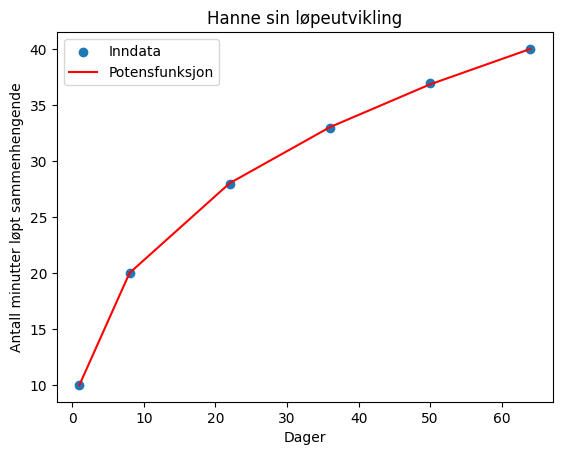

y-verdien når x = 29 er 30.74
x-verdien når y = 45 er 90.83
Stigningstallet mellom punktene (1.00, 10.00) og (60.00, 39.19) er: 0.49
Stigningstallet til tangenten i punktet (6, 18.17) er: 1.01


In [3]:
#Potens regresjon med dummy data + stigningstallet til tangenten i punktet - kode
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [1, 8, 22, 36, 50, 64]                              #Endre tallene så de passer til din oppgave
y = [10, 20, 28, 33, 37, 40]                            #Endre tallene så de passer til din oppgave

# Konverter y-verdiene til logaritmisk form
log_y = np.log10(y)

# Konverter x-verdiene til logaritmisk form
log_x = np.log10(x)

# Beregn gjennomsnittet av de logaritmiske verdiene
log_y_mean = np.mean(log_y)
log_x_mean = np.mean(log_x)

# Beregn variansen til de logaritmiske x-verdiene
var_log_x = np.sum((log_x - log_x_mean) ** 2)

# Beregn kovariansen mellom de logaritmiske x- og y-verdiene
cov_log_xy = np.sum((log_x - log_x_mean) * (log_y - log_y_mean))

# Beregn koeffisientene a og b
b = cov_log_xy / var_log_x
a = 10 ** (log_y_mean - b * log_x_mean)

# Potensfunksjonen
def power_func(x, a, b):
    return a * x ** b

# Derivert potensfunksjon
def power_func_derivative(x, a, b):
    return a * b * x ** (b - 1)

# Skriv ut potensfunksjonen
print("Potensfunksjon: y(x) = {:.2f} * x^({:.2f})".format(a, b))

# Plot datasettet og potensfunksjonen
plt.scatter(x, y, label='Inndata')
plt.plot(x, power_func(x, a, b), label='Potensfunksjon',color = "r")
plt.xlabel('Dager')                                                        # Navn på x-aksen
plt.ylabel('Antall minutter løpt sammenhengende')                          # Navn på y-aksen
plt.legend()
plt.title('Hanne sin løpeutvikling')                                       # Overskriften på grafen 
plt.show()

# Finn y-verdien når x = ...
x_verdi = 29
y_verdi = a*x_verdi**b
print(f"y-verdien når x = {x_verdi} er {y_verdi:.2f}")

# Finn x-verdien når y = ...
y_verdi = 45
x_verdi = (y_verdi/a)**(1/b)
print(f"x-verdien når y = {y_verdi} er {x_verdi:.2f}")

# Finn stigningstallet mellom to punkter (rett linje)
x1 = 1                                                      # Velg valgfri x1-verdi
x2 = 60                                                     # Velg valgfri x2-verdi

y1 = power_func(x1, a, b)
y2 = power_func(x2, a, b)

# Beregn stigningstallet
m = (y2 - y1) / (x2 - x1)

# Skriv ut stigningstallet
print("Stigningstallet mellom punktene ({:.2f}, {:.2f}) og ({:.2f}, {:.2f}) er: {:.2f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet i et valgt punkt
x3 = 6                                                      # Valgfri x3-verdi
y3 = power_func(x3, a, b)                                    # Valgfri y3-verdi

# Beregn stigningstallet i punktet (x3, y3)
m_tangent = power_func_derivative(x3, a, b)

# Skriv ut stigningstallet
print("Stigningstallet til tangenten i punktet ({}, {:.2F}) er: {:.2f}".format(x3, y3, m_tangent))

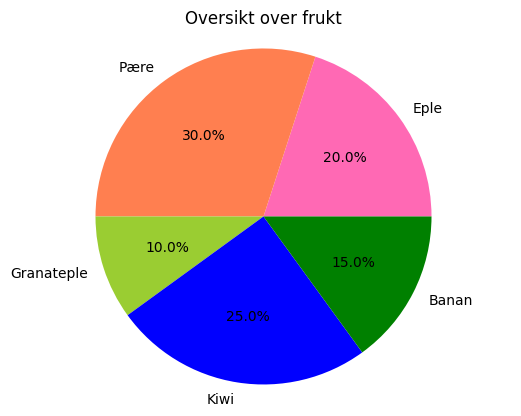

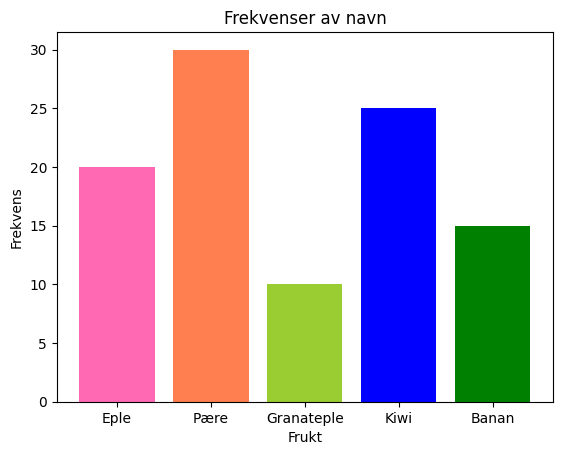

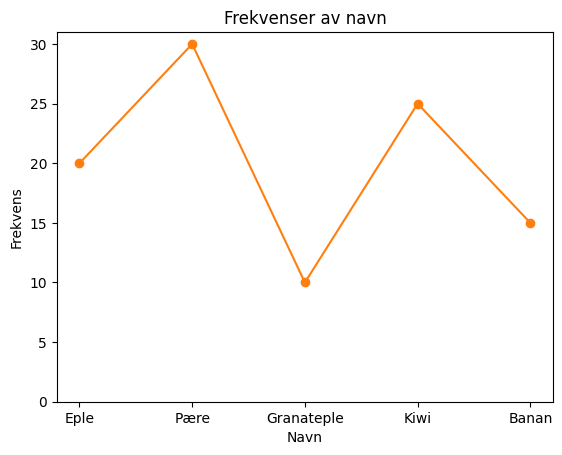

In [7]:
# Søyle, sektor og linjediagram med 1 sett med frekvenser
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["Eple", "Pære", "Granateple", "Kiwi", "Banan"]
frekvenser = [20, 30, 10, 25, 15]

# Fargevalg
farger = ['hotpink','coral','yellowgreen','b','g']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Oversikt over frukt")
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")
plt.xlabel("Frukt")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

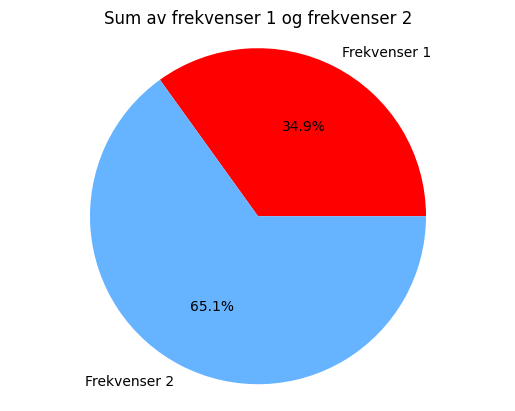

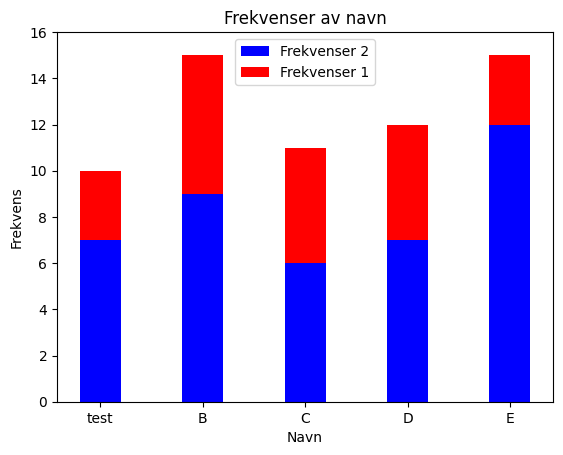

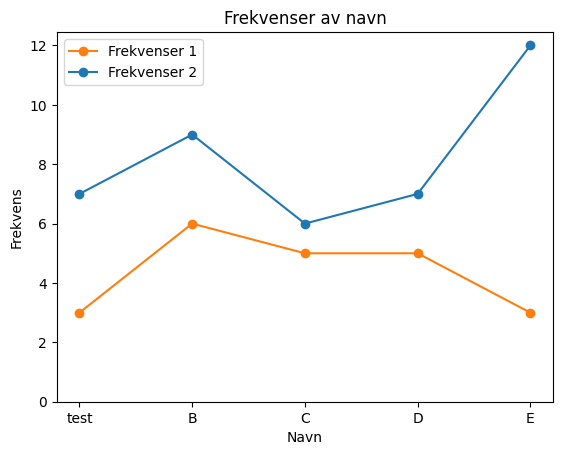

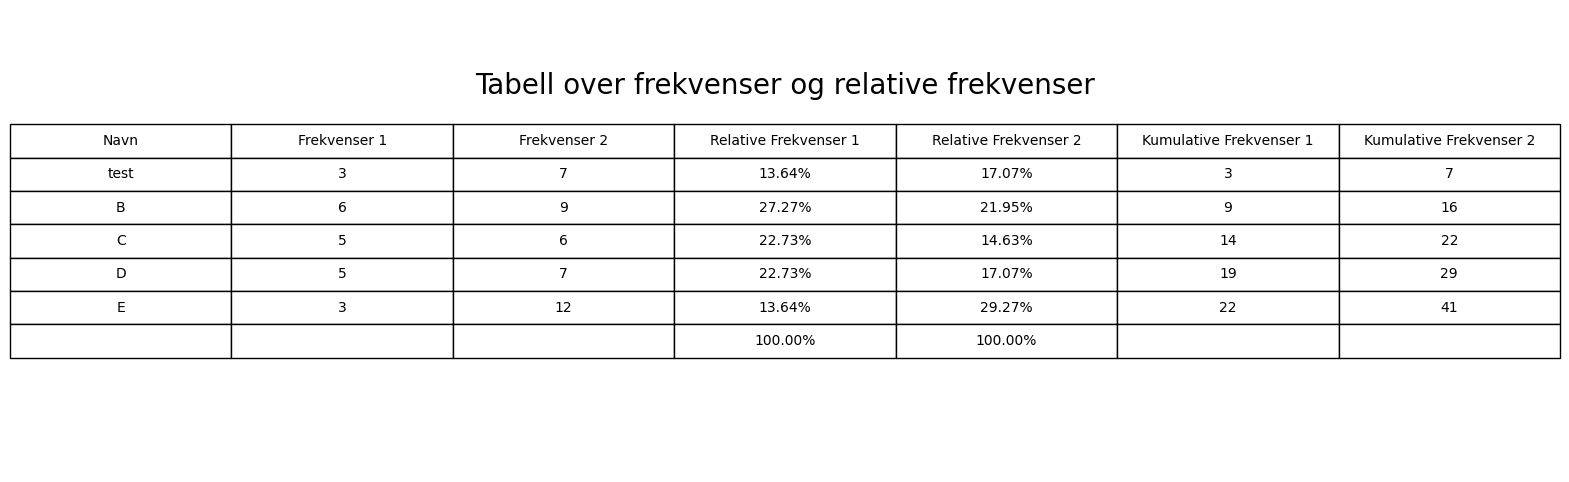

In [64]:
# Søyle, sektor og linjediagram med 2 sett med frekvenser + Frekvenstabell med relative og kumulative frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"]   # Forandre verdiene dine til din oppgave
frekvenser_1 = [3, 6, 5, 5, 3]        # Forandre frekvensene dine til din oppgave
frekvenser_2 = [7, 9, 6, 7, 12]       # Forandre frekvensene dine til din oppgave

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)  # Corrected variable name here

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 * 100 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 * 100 for f in frekvenser_2]

# Calculate cumulative frequencies separately for each set
cumulative_frekvenser_1 = np.cumsum(frekvenser_1)
cumulative_frekvens_2 = np.cumsum(frekvenser_2)

# Create a table, but remove the total cumulative values for the last row
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [str(f) for f in cumulative_frekvenser_1], [str(f) for f in cumulative_frekvenser_2]))

# Add a row with just the sum of relative frequencies, but no cumulative values
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%', '', ''))

# Create the column labels for the table
table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulative Frekvenser 1', 'Kumulative Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=20)
table.scale(2, 2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=20, y=0.8)  # Adjust the y position of the title

# Show the plot
plt.show()

In [13]:
# Øvingsoppgave 6.215 s.353
arv = 150000
vekstfaktor = 1.015
år = 0
while år <= 10:
  arv = arv * vekstfaktor
  print(arv)
  år = år + 1

152249.99999999997
154533.74999999994
156851.75624999992
159204.5325937499
161592.60058265613
164016.48959139595
166476.73693526688
168973.88798929585
171508.49630913528
174081.1237537723
176692.34061007886


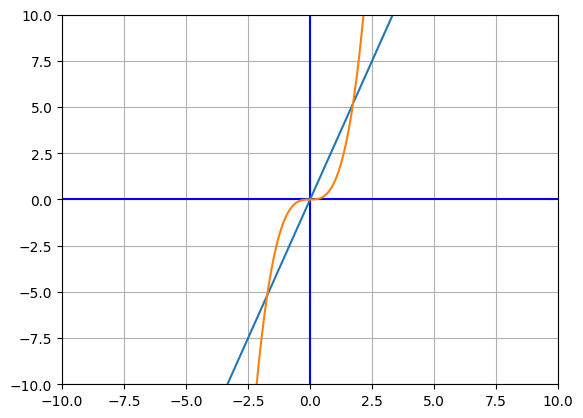

In [12]:
# Bruk NUMPY til å lage grafer :)
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10

# Define how many points to plot 
points = 10*(xmax-xmin)

# Define the array of x values once
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = 3*x
plt.plot(x, y1) 

# line 2
y2 = x**3
plt.plot(x, y2) 

ax.grid(True)
plt.show()

In [1]:
#Her er pythonprogrammet som simulerer eksperimentet med terningkast i Utforsk halveringstid på s.215. 
from random import randint

antallTerninger = 2000
antallKast = 0

while antallTerninger > 0:
  for i in range(antallTerninger):
    terning = randint(1, 6)
    if terning == 6:
      antallTerninger -= 1
  antallKast += 1
  print("Etter", antallKast, "kast er det", antallTerninger, "terninger igjen.")

Etter 1 kast er det 1644 terninger igjen.
Etter 2 kast er det 1369 terninger igjen.
Etter 3 kast er det 1141 terninger igjen.
Etter 4 kast er det 933 terninger igjen.
Etter 5 kast er det 784 terninger igjen.
Etter 6 kast er det 662 terninger igjen.
Etter 7 kast er det 550 terninger igjen.
Etter 8 kast er det 451 terninger igjen.
Etter 9 kast er det 376 terninger igjen.
Etter 10 kast er det 312 terninger igjen.
Etter 11 kast er det 262 terninger igjen.
Etter 12 kast er det 214 terninger igjen.
Etter 13 kast er det 171 terninger igjen.
Etter 14 kast er det 143 terninger igjen.
Etter 15 kast er det 116 terninger igjen.
Etter 16 kast er det 97 terninger igjen.
Etter 17 kast er det 84 terninger igjen.
Etter 18 kast er det 74 terninger igjen.
Etter 19 kast er det 62 terninger igjen.
Etter 20 kast er det 48 terninger igjen.
Etter 21 kast er det 42 terninger igjen.
Etter 22 kast er det 34 terninger igjen.
Etter 23 kast er det 28 terninger igjen.
Etter 24 kast er det 25 terninger igjen.
Etter 2

## Masse ulike grafer + glidere for grafer

a verdien er 11.55
b verdien er 128.2
y(x) = ax + b
Lineær funksjon: y(x) = 11.55 * x + 128.2


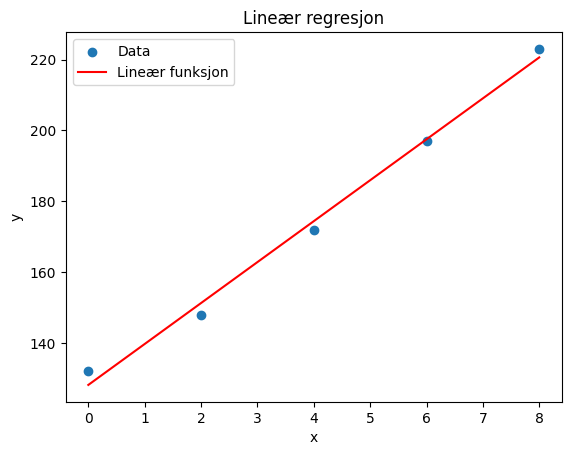

y-verdi for x=15: 301.45
x-verdi for y=15: -9.80


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]    # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")

In [60]:
# sliders and zoom
# y = mx + b

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(m,b,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = m*x + b
    plt.plot(x, y1)
    plt.show()

# Set up the sliders
interactive_plot = interactive(f, m=(-9, 9), b=(-9, 9), zoom=(1,100))
interactive_plot

interactive(children=(IntSlider(value=0, description='m', max=9, min=-9), IntSlider(value=0, description='b', …

In [61]:
# sliders and zoom
# y = ax**2 + bx + c

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(a,b,c,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = a*x**2 + b*x + c
    plt.plot(x, y1)
    plt.grid()
    plt.show()

# Set up the sliders
interactive_plot = interactive(f, a=(-9, 9),b=(-9, 9),c=(-9, 9),zoom=(1,100))
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=9, min=-9), IntSlider(value=0, description='b', …

In [ ]:
# sliders and zoom
# y = sqrt(x)
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Definer grafefunksjonen
def f(a, b, c, zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 1000  # Økt antall punkter for jevnere graf
    x = np.linspace(xmin, xmax, points)
    
    # Filtrer ut negative verdier for kvadratroten
    x = x[x >= b]

    plt.figure(figsize=(8, 8))  # Større figur for bedre visning
    plt.axis([xmin, xmax, ymin, ymax])  # Vindu størrelse
    plt.axhline(0, color='black')  # Svart x-akse
    plt.axvline(0, color='black')  # Svart y-akse
    
    # Linje 1
    y1 = a * np.sqrt(x - b) + c
    plt.plot(x, y1, label=f'y = {a}√(x - {b}) + {c}')
    plt.legend()
    plt.show()

# Sett opp sliderne
interactive_plot = interactive(f, a=(-9, 9, 0.1), b=(-9, 9, 0.1), c=(-9, 9, 0.1), zoom=(1, 100, 1))
interactive_plot

In [ ]:
# sliders and zoom
# y = x**4 + ...

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(a,b,c,d,e,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = a*x**4 + b*x**3 + c*x**2 + d*x + e
    plt.plot(x, y1)
    plt.show()

# Set up the sliders
i_plot=interactive(f,a=(-9,9),b=(-9,9),c=(-9,9),d=(-9,9),e=(-9,9),zoom=(1,100))
i_plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot([xmin,xmax],[5,5],'r')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**2) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# plt.plot(x, x**3) 
plt.plot(x, x**3 - 2*x**2 - 3*x + 4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**4)
plt.show()

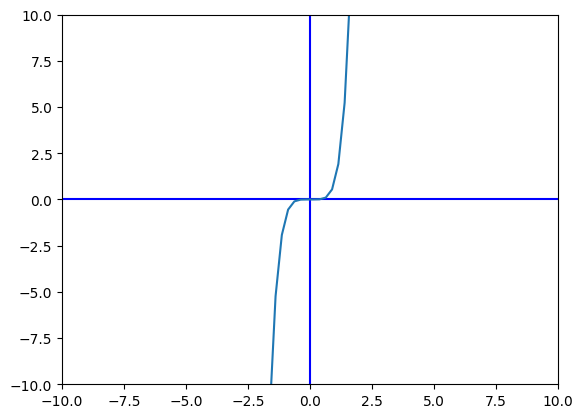

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.sqrt(x)) 
# plt.plot(x, -np.sqrt(x))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**(1/2))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.cbrt(x))


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 3*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, 2**x)


plt.show()

In [ ]:
# Ulikheter
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = x+6
plt.plot(x, y1,'-')
plt.fill_between(x, y1, ymax, facecolor='red')

# line 2
y2 = x+3
plt.plot(x, y2,'-')
plt.fill_between(x, y2, y1, facecolor='yellow')

# line 3
y3 = x-1
plt.plot(x, y3)
plt.fill_between(x, y3, y2, facecolor='green')

# line 4
y4 = x-4
plt.plot(x, y4)
plt.fill_between(x, y4, y3, facecolor='blue')

plt.show()

# $\color{green}{\text{Gjør om Frekvenstabell fra Excel og regner ut mye forskjellig ++}}$

DataFrame lastet inn fra: C:/Users/Christian/OneDrive - Akershus fylkeskommune/Eksempel s. 59.xlsx
       profiler   Frekvens
count  7.000000   7.000000
mean   3.000000  42.857143
std    2.160247  29.650343
min    0.000000  12.000000
25%    1.500000  24.000000
50%    3.000000  34.000000
75%    4.500000  54.000000
max    6.000000  98.000000


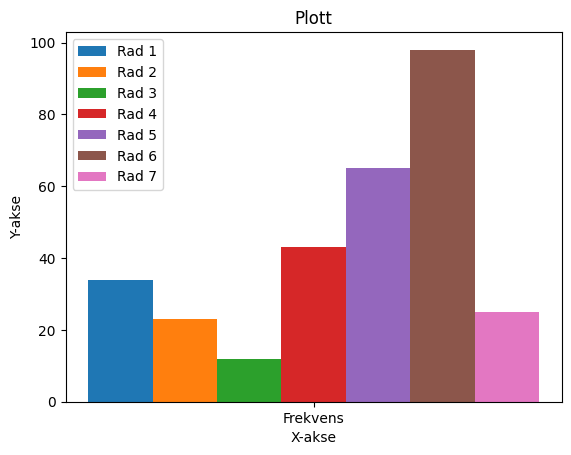

Gjennomsnittsverdi: 3.5866666666666664


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import filedialog, messagebox, simpledialog
from tkinter.ttk import Progressbar
import logging

root = Tk()
root.title('Dataanalyseapplikasjon')

# Global variabel for å lagre DataFrame
df = None

# Konfigurer logging
logging.basicConfig(filename='app.log', level=logging.ERROR)

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Velg en Excel-fil", filetypes=(("Excel-filer", "*.xlsx *.xls"), ("Alle filer", "*.*")))
    if filename:
        try:
            progress = Progressbar(root, orient=HORIZONTAL, length=100, mode='determinate')
            progress.pack(pady=10)
            progress.start()
            df = pd.read_excel(filename)
            df.to_csv('output_dataset.csv', index=False)
            label.config(text="Fil lastet inn og datasett opprettet!")
            print(f"DataFrame lastet inn fra: {filename}")
            print(df.describe())
            progress.stop()
            progress.destroy()
        except Exception as e:
            progress.stop()
            progress.destroy()
            logging.error(f"Error loading file: {e}")
            messagebox.showerror("Feil", f"Kunne ikke laste fil: {e}")

def plot_data():
    global df
    if df is not None:
        plot_type = simpledialog.askstring("Input", "Skriv inn plottype (line, bar, pie, qq, histogram):")
        if plot_type:
            plot_type = plot_type.lower()  # Gjør input liten for bedre håndtering
            if plot_type in ["line", "bar", "pie", "qq", "histogram"]:
                plot_function = globals().get(f"plot_{plot_type}")
                if plot_function:
                    plot_generic(plot_function)
            else:
                messagebox.showerror("Feil", "Ugyldig plottype. Vennligst skriv 'line', 'bar', 'pie', 'qq', eller 'histogram'.")
        else:
            messagebox.showerror("Feil", "Ingen plottype oppgitt. Vennligst skriv inn en plottype.")
    else:
        messagebox.showerror("Feil", "DataFrame er ikke lastet inn. Vennligst last inn Excel-filen først.")

def get_plot_details():
    """Generer plottdetaljer automatisk fra data eller spør brukeren."""
    x_label = simpledialog.askstring("Input", "Skriv inn navn på x-aksen:", initialvalue='X-akse')
    y_label = simpledialog.askstring("Input", "Skriv inn navn på y-aksen:", initialvalue='Y-akse')
    title = simpledialog.askstring("Input", "Skriv inn navn på plottet:", initialvalue='Plott')
    return x_label, y_label, title

def plot_generic(plot_func):
    try:
        x_label, y_label, title = get_plot_details()
        plot_func(x_label, y_label, title)
    except Exception as e:
        messagebox.showerror("Feil", f"Kunne ikke lage plott: {e}")

def plot_line(x_label, y_label, title):
    x_akse = df.columns[1:]
    for i in range(len(df)):
        plt.plot(x_akse, df.iloc[i, 1:], marker='o', label=f'Rad {i+1}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bar(x_label, y_label, title):
    x_akse = df.columns[1:]
    width = 0.2  # Bredde på stolper
    x = range(len(x_akse))
    for i in range(len(df)):
        plt.bar([p + width*i for p in x], df.iloc[i, 1:], width=width, label=f'Rad {i+1}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks([p + width*(len(df)-1)/2 for p in x], x_akse)  # Juster x-ticks for å ha mellomrom mellom søylene
    plt.legend()
    plt.show()

def plot_pie(x_label, y_label, title):
    x_akse = df.columns[1:]
    for i in range(len(df)):
        plt.figure(figsize=(10, 6))
        plt.pie(df.iloc[i, 1:], labels=x_akse, autopct='%1.1f%%', startangle=140)
        plt.title(f'{title} for rad {i+1}')
        plt.axis('equal')  # Sørg for at sektordiagrammet er sirkulært
        plt.show()

def plot_qq(x_label, y_label, title):
    for col in df.columns[1:]:
        sns.qqplot(df[col], line='s')
        plt.title(f'{title} for {col}')
        plt.show()

def plot_histogram(x_label, y_label, title):
    for col in df.columns[1:]:
        plt.hist(df[col], bins=10, alpha=0.7)
        plt.title(f'{title} for {col}')
        plt.xlabel(col)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()

def calculate_statistics():
    global df
    if df is not None:
        stats_type = simpledialog.askstring("Input", "Skriv inn statistikktype (relative_frequency, cumulative_frequency, median, mean, std_dev):")
        if stats_type:  # Check if stats_type is not None
            stats_type = stats_type.lower()  # Gjør input liten for bedre håndtering
            if stats_type in ["relative_frequency", "cumulative_frequency", "median", "mean", "std_dev"]:
                calc_function = globals().get(f"calculate_{stats_type}")
                if calc_function:
                    calc_function()
            else:
                messagebox.showerror("Feil", "Ugyldig statistikktype. Vennligst skriv 'relative_frequency', 'cumulative_frequency', 'median', 'mean', eller 'std_dev'.")
        else:
            messagebox.showerror("Feil", "Ingen statistikktype oppgitt. Vennligst skriv inn en statistikktype.")
    else:
        messagebox.showerror("Feil", "DataFrame er ikke lastet inn. Vennligst last inn Excel-filen først.")

def calculate_relative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    relative_freq = freq_table / freq_table.sum()
    print("Relative frekvenser:")
    print(relative_freq)

def calculate_cumulative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    cumulative_freq = freq_table.cumsum()
    print("Kumulative frekvenser:")
    print(cumulative_freq)

def calculate_median():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    values = []
    for t, f in zip(types, frequencies):
        values.extend([t] * int(f))
    median_value = pd.Series(values).median()
    print(f"Medianverdi: {median_value}")

def calculate_mean():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    mean_value = sum(types * frequencies) / sum(frequencies)
    print(f"Gjennomsnittsverdi: {mean_value}")

def calculate_std_dev():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    mean_value = sum(types * frequencies) / sum(frequencies)
    variance = sum(frequencies * (types - mean_value)**2) / sum(frequencies)
    std_dev_value = variance**0.5
    print(f"Standardavvik: {std_dev_value}")

def close_app():
    print("Avslutter applikasjonen...")
    root.destroy()

# UI-komponenter
label = Label(root, text="")
label.pack()

my_button = Button(root, text="Åpne fil", command=open_file)
my_button.pack()

plot_button = Button(root, text="Plot Data", command=plot_data)
plot_button.pack()

stats_button = Button(root, text="Beregn statistikk", command=calculate_statistics)
stats_button.pack()

exit_button = Button(root, text="Avslutt", command=close_app)
exit_button.pack()

root.mainloop()

# $\color{blue}{\text{Kopiere fra Excel eller hente data fra Pandas ved hjelp av tkinter}}$

In [ ]:
from tkinter import *
from tkinter import filedialog, messagebox
import pandas as pd

root = Tk()
root.title('Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")

## Husk at den koden over lagrer datasettet i Excel filen som df og den oppdaterer koden fortløpende

In [ ]:
df.head()

In [ ]:
df.describe()

## Her spør den deg igjen om å velge Excel filen slik at man kan lage søylediagram, sektordiagram og linjediagram tkinter

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import filedialog, messagebox

root = Tk()
root.title('Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def plot_data():
    global df
    if df is not None:
        # Anta at dataene er i rad 0 for x-aksen og kolonnene 'Verdi1', 'Verdi2', 'Verdi3' for y-verdier
        x_akse = df.columns[1:]  # Bruk kolonnenavnene som x-akse
        verdi1 = df.iloc[0, 1:]  # Første rad, alle kolonner unntatt den første
        verdi2 = df.iloc[1, 1:]  # Andre rad, alle kolonner unntatt den første
        verdi3 = df.iloc[2, 1:]  # Tredje rad, alle kolonner unntatt den første

        # Linjediagram
        plt.figure(figsize=(10, 6))
        #plt.plot(x_akse, verdi1, marker='o', label='2PY-1')
        plt.plot(x_akse, verdi2, marker='x', label='2PY-1')
        plt.plot(x_akse, verdi3, marker='s', label='2PY-2')
        plt.title('Linjediagram')
        plt.xlabel('År')
        plt.ylabel('Område')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Sektordiagram (Pie chart) for Verdi1
        plt.figure(figsize=(10, 6))
        plt.pie(verdi1, labels=x_akse, autopct='%1.1f%%', startangle=140)
        plt.title('Sektordiagram for Verdi1')
        plt.axis('equal')  # Sikrer at sektordiagrammet er sirkulært
        plt.show()

        # Søylediagram (Bar chart) for Verdi1, Verdi2, Verdi3
        width = 0.2  # Bredden på søylene
        x = range(len(x_akse))

        plt.figure(figsize=(10, 6))
        #plt.bar([p - width for p in x], verdi1, width=width, label='Oslo')
        plt.bar(x, verdi2, width=width, label='Rogaland')
        plt.bar([p + width for p in x], verdi3, width=width, label='Norge')
        plt.title('Søylediagram') # Forandre navn på Tittel
        plt.xlabel('År') # Forandre navn på x-aksen
        plt.ylabel('Verdi') # Forandre navn på y-aksen
        plt.xticks(x, x_akse)
        plt.legend()
        plt.show()
    else:
        messagebox.showerror("Error", "DataFrame is not loaded. Please load the Excel file first.")

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

plot_button = Button(root, text="Plot Data", command=plot_data)
plot_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")


: 

# Statistikk + Annuitetslån/Serielån + litt annet

In [ ]:
#Andregradslikning kalkulator
from sympy import symbols, Eq, solve, I

# Function to solve quadratic equations
def løs_likning(a, b, c):
    x = symbols('x')
    likning = Eq(a*x**2 + b*x + c, 0)
    diskriminant = b**2 - 4*a*c

    if diskriminant < 0:
        print("Likningen har komplekse løsninger.")
        komplekse_løsninger = solve(likning, x)
        for i, kompleks_løsning in enumerate(komplekse_løsninger, start=1):
            løsning_str = f"z{i} = {kompleks_løsning.evalf(2)}"
            print(løsning_str)
   
    elif diskriminant == 0:
        print("Likningen har én reell løsning.")
        løsning = solve(likning, x)
        print(f"x = {løsning[0].evalf(2)}")
        
    else:
        print("Likningen har to reelle løsninger.")
        løsninger = solve(likning, x)
        løsning_1 = løsninger[0].evalf(2)
        løsning_2 = løsninger[1].evalf(2)
        print(f"x = {løsning_1} og x = {løsning_2}")

# Example usage:
a = 4
b = 2
c = 1

løs_likning(a, b, c)

In [ ]:
# Statistikk T-test
from scipy import stats

sales_with_chipotle = [13.4, 10.9, 11.2, 11.8,
					14, 15.3, 14.2, 12.6, 
					17, 16.2, 16.5, 15.7]

sales_without_chipotle = [12, 11.7, 10.7, 11.2,
						14.8, 14.4, 13.9, 13.7,
						16.9, 16, 15.6, 16]

t_value, p_value = stats.ttest_ind(sales_with_chipotle,
								sales_without_chipotle)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

alpha = 0.05
if p_value <= alpha:

	print('Conclusion', 'n', 'Since p-value(=%f)' % p_value, 
		'<', 'alpha(=%.2f)' % alpha, 
		'''We reject the null hypothesis H0. \
		So we conclude that the \
		Mean sales is affected by \
		adding chipotle sauce to the best\
		selling ingredient i.e., μ1 = μ2 at \
		%.2f level of significance.''' % alpha)

else:

	print('Conclusion', 'n', 'Since p-value(=%f)' % p_value,
		'>', 'alpha(=%.2f)' % alpha,
		'We fail to reject the null \
		hypothesis H0, which signifies \
		the Mean of sales is not affected\
		by adding chipotle sauce.')

D'Agostino-Pearson test p-value: 0.8900350082402695
Anderson-Darling test p-value: 0.2432179174634257
Shapiro-Wilk test p-value: 0.5912267898687746
Kolmogorov-Smirnov test p-value: 0.11930823166569182


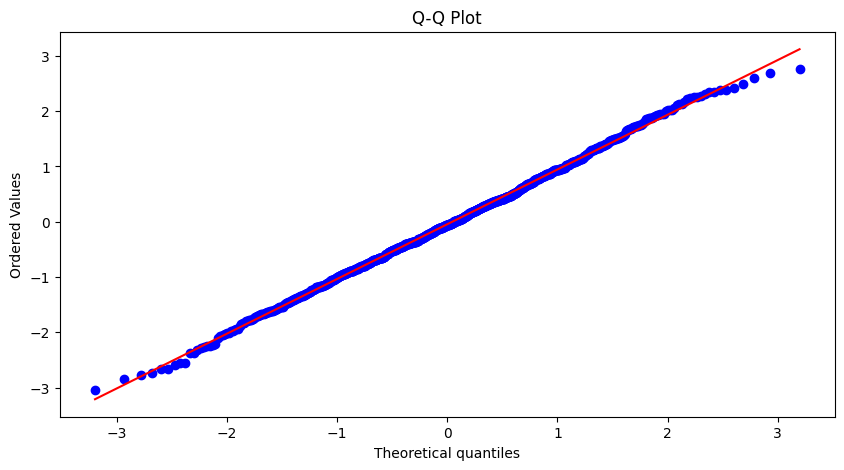

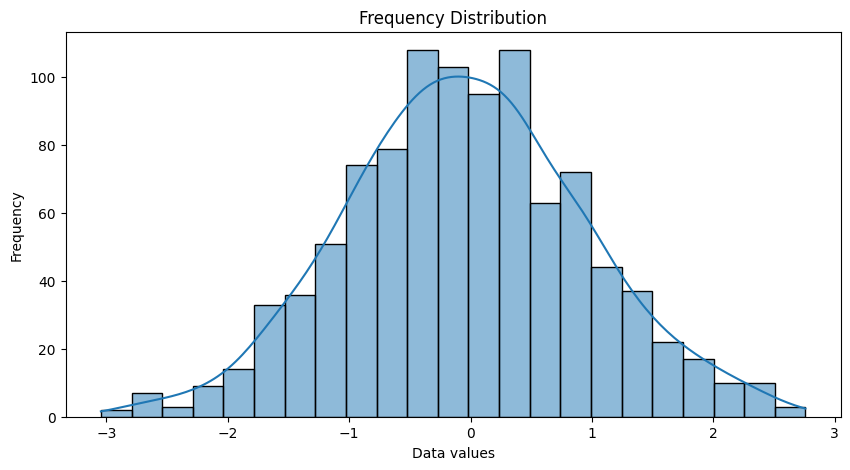

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generer noen data (for demonstrasjonsformål)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Funksjon for å utføre normalitetstester
def normality_tests(data):
    results = {}
    
    # D'Agostino-Pearson test
    k2, p = stats.normaltest(data)
    results['D\'Agostino-Pearson'] = p
    
    # Anderson-Darling test
    ad_stat, critical_values, significance_level = stats.anderson(data, dist='norm')
    results['Anderson-Darling'] = ad_stat
    
    # Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    results['Shapiro-Wilk'] = p
    
    # Kolmogorov-Smirnov test
    d_stat, p = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = p
    
    return results

# Utfør normalitetstester
test_results = normality_tests(data)

# Skriv ut resultatene
for test, p_value in test_results.items():
    print(f"{test} test p-value: {p_value}")

# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Frekvensfordeling med histogram
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import tkinter as tk
from tkinter import filedialog, ttk
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

class DataAnalysisGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Analysis GUI")
        self.data = None

        # Create tabs for different analysis tasks
        self.tab_control = ttk.Notebook(self.root)
        self.tab_import = ttk.Frame(self.tab_control)
        self.tab_visualize = ttk.Frame(self.tab_control)
        self.tab_statistics = ttk.Frame(self.tab_control)
        self.tab_regression = ttk.Frame(self.tab_control)
        self.tab_control.add(self.tab_import, text="Import Data")
        self.tab_control.add(self.tab_visualize, text="Visualize")
        self.tab_control.add(self.tab_statistics, text="Statistics")
        self.tab_control.add(self.tab_regression, text="Regression")
        self.tab_control.pack(expand=1, fill="both")

        # Import Data tab
        self.import_frame = ttk.Frame(self.tab_import)
        self.import_button = ttk.Button(self.import_frame, text="Import Excel Sheet", command=self.import_data)
        self.import_button.pack(pady=10)
        self.import_frame.pack(fill="x", padx=10, pady=10)

        # Visualize tab
        self.visualize_frame = ttk.Frame(self.tab_visualize)
        self.plot_type = tk.StringVar()
        self.plot_type.set("Histogram")  # default value
        self.plot_options = ["Histogram", "Line Plot", "Bar Graph", "QQ-Plot", "Pie Chart"]
        self.plot_menu = ttk.OptionMenu(self.visualize_frame, self.plot_type, *self.plot_options)
        self.plot_menu.pack(pady=10)
        self.x_axis_label = ttk.Label(self.visualize_frame, text="X-axis:")
        self.x_axis_label.pack()
        self.x_axis_entry = ttk.Entry(self.visualize_frame)
        self.x_axis_entry.pack()
        self.y_axis_label = ttk.Label(self.visualize_frame, text="Y-axis:")
        self.y_axis_label.pack()
        self.y_axis_entry = ttk.Entry(self.visualize_frame)
        self.y_axis_entry.pack()
        self.grid_on = tk.BooleanVar()
        self.grid_checkbox = ttk.Checkbutton(self.visualize_frame, text="Grid On", variable=self.grid_on)
        self.grid_checkbox.pack(pady=10)
        self.plot_button = ttk.Button(self.visualize_frame, text="Create Plot", command=self.create_plot)
        self.plot_button.pack(pady=10)
        self.visualize_frame.pack(fill="x", padx=10, pady=10)

        # Statistics tab
        self.statistics_frame = ttk.Frame(self.tab_statistics)
        self.stats_type = tk.StringVar()
        self.stats_type.set("t-test")  # default value
        self.stats_options = ["t-test", "One-way ANOVA", "Two-way ANOVA"]
        self.stats_menu = ttk.OptionMenu(self.statistics_frame, self.stats_type, *self.stats_options)
        self.stats_menu.pack(pady=10)
        self.stats_button = ttk.Button(self.statistics_frame, text="Run Statistics", command=self.run_statistics)
        self.stats_button.pack(pady=10)
        self.statistics_frame.pack(fill="x", padx=10, pady=10)

        # Regression tab
        self.regression_frame = ttk.Frame(self.tab_regression)
        self.regression_type = tk.StringVar()
        self.regression_type.set("Linear Regression")  # default value
        self.regression_options = ["Linear Regression", "Poisson Regression", "Binomial Regression", "Student's t-test"]
        self.regression_menu = ttk.OptionMenu(self.regression_frame, self.regression_type, *self.regression_options)
        self.regression_menu.pack(pady=10)
        self.predictor_label = ttk.Label(self.regression_frame, text="Predictor(s) (comma-separated):")
        self.predictor_label.pack()
        self.predictor_entry = ttk.Entry(self.regression_frame)
        self.predictor_entry.pack()
        self.response_label = ttk.Label(self.regression_frame, text="Response Variable:")
        self.response_label.pack()
        self.response_entry = ttk.Entry(self.regression_frame)
        self.response_entry.pack()
        self.regression_button = ttk.Button(self.regression_frame, text="Run Regression", command=self.run_regression)
        self.regression_button.pack(pady=10)
        self.normality_test = tk.BooleanVar()
        self.normality_checkbox = ttk.Checkbutton(self.regression_frame, text="Test for Normality", variable=self.normality_test)
        self.normality_checkbox.pack(pady=10)
        self.regression_frame.pack(fill="x", padx=10, pady=10)

        # Normality Test tab (added as a bonus)
        self.normality_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.normality_tab, text="Normality Test")
        self.normality_frame = ttk.Frame(self.normality_tab)
        self.normality_test_type = tk.StringVar()
        self.normality_test_type.set("Shapiro-Wilk Test")  # default value
        self.normality_test_options = ["Shapiro-Wilk Test", "Anderson-Darling Test", "Lilliefors Test"]
        self.normality_test_menu = ttk.OptionMenu(self.normality_frame, self.normality_test_type, *self.normality_test_options)
        self.normality_test_menu.pack(pady=10)
        self.normality_variable_label = ttk.Label(self.normality_frame, text="Variable to Test:")
        self.normality_variable_label.pack()
        self.normality_variable_entry = ttk.Entry(self.normality_frame)
        self.normality_variable_entry.pack()
        self.normality_button = ttk.Button(self.normality_frame, text="Run Normality Test", command=self.run_normality_test)
        self.normality_button.pack(pady=10)
        self.normality_frame.pack(fill="x", padx=10, pady=10)

    def import_data(self):
        file_path = filedialog.askopenfilename(title="Select Excel File", filetypes=[("Excel Files", "*.xlsx *.xls")])
        if file_path:
            self.data = pd.read_excel(file_path)
            print("Data imported successfully!")

    def create_plot(self):
        if self.data is None:
            print("Please import data first!")
            return
        plot_type = self.plot_type.get()
        x_axis = self.x_axis_entry.get()
        y_axis = self.y_axis_entry.get()
        grid_on = self.grid_on.get()

        if plot_type == "Histogram":
            self.data.hist(column=x_axis, grid=grid_on)
        elif plot_type == "Line Plot":
            plt.plot(self.data[x_axis], self.data[y_axis], grid=grid_on)
        elif plot_type == "Bar Graph":
            self.data.plot(kind='bar', x=x_axis, y=y_axis, grid=grid_on)
        elif plot_type == "QQ-Plot":
            stats.probplot(self.data[x_axis], plot=plt)
        elif plot_type == "Pie Chart":
            self.data.plot(kind='pie', y=x_axis, autopct='%1.1f%%', grid=grid_on)

        plt.show()
def run_statistics(self):
    if self.data is None:
        print("Please import data first!")
        return
    stats_type = self.stats_type.get()

    if stats_type == "t-test":
        # assuming two groups for simplicity
        group1 = self.data[self.data['group'] == 'A'][self.x_axis_entry.get()]
        group2 = self.data[self.data['group'] == 'B'][self.x_axis_entry.get()]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    elif stats_type == "One-way ANOVA":
        # assuming one factor for simplicity
        factor = self.x_axis_entry.get()
        response = self.y_axis_entry.get()
        f_stat, p_val = stats.f_oneway(*[self.data[self.data[factor] == level][response] for level in self.data[factor].unique()])
        print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
    elif stats_type == "Two-way ANOVA":
        # assuming two factors for simplicity
        factor1 = self.x_axis_entry.get()
        factor2 = self.y_axis_entry.get()
        response = "response_variable"  # TODO: add entry for response variable
        formula = f"{response} ~ {factor1} * {factor2}"
        model = sm.formula.api.ols(formula, data=self.data).fit()
        print(sm.stats.anova_lm(model, typ=2))

def run_regression(self):
    if self.data is None:
        print("Please import data first!")
        return
    regression_type = self.regression_type.get()
    predictors = [x.strip() for x in self.predictor_entry.get().split(",")]
    response = self.response_entry.get()

    if regression_type == "Linear Regression":
        model = sm.OLS.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data).fit()
        print(model.summary())
    elif regression_type == "Poisson Regression":
        model = sm.GLM.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data, family=sm.families.Poisson()).fit()
        print(model.summary())
    elif regression_type == "Binomial Regression":
        model = sm.GLM.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data, family=sm.families.Binomial()).fit()
        print(model.summary())
    elif regression_type == "Student's t-test":
        # note: this is not a regression, but rather a hypothesis test
        group1 = self.data[self.data['group'] == 'A'][response]
        group2 = self.data[self.data['group'] == 'B'][response]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

    if self.normality_test.get():
        self.run_normality_test(variable=response)

def run_normality_test(self, variable=None):
    if self.data is None:
        print("Please import data first!")
        return
    if variable is None:
        variable = self.normality_variable_entry.get()
    
    test_type = self.normality_test_type.get()
    data = self.data[variable]

    if test_type == "Shapiro-Wilk Test":
        stat, p = stats.shapiro(data)
    elif test_type == "Anderson-Darling Test":
        result = stats.anderson(data)
        stat, p = result.statistic, result.significance_level[0]
    elif test_type == "Lilliefors Test":
        stat, p = stats.kstest(data, 'norm')

    print(f"{test_type} - Statistic: {stat:.4f}, p-value: {p:.4f}")


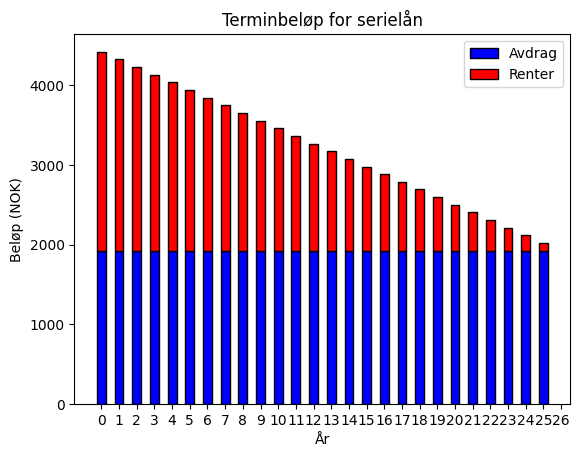

  År  Termin       Avdrag        Rente  Terminbeløp  Kumulativ Rente  \
   1       1  1923.076923  2500.000000  4423.076923      2500.000000   
   2       2  1923.076923  2403.846154  4326.923077      4903.846154   
   3       3  1923.076923  2307.692308  4230.769231      7211.538462   
   4       4  1923.076923  2211.538462  4134.615385      9423.076923   
   5       5  1923.076923  2115.384615  4038.461538     11538.461538   
   6       6  1923.076923  2019.230769  3942.307692     13557.692308   
   7       7  1923.076923  1923.076923  3846.153846     15480.769231   
   8       8  1923.076923  1826.923077  3750.000000     17307.692308   
   9       9  1923.076923  1730.769231  3653.846154     19038.461538   
  10      10  1923.076923  1634.615385  3557.692308     20673.076923   
  11      11  1923.076923  1538.461538  3461.538462     22211.538462   
  12      12  1923.076923  1442.307692  3365.384615     23653.846154   
  13      13  1923.076923  1346.153846  3269.230769     25000.00

In [5]:
# Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere
lånebeløp = 50000
rente = 0.05
antall_år = 26
antall_perioder_per_år = 1

# Beregninger
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_serielån(
    lånebeløp, rente, antall_år, antall_perioder_per_år)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

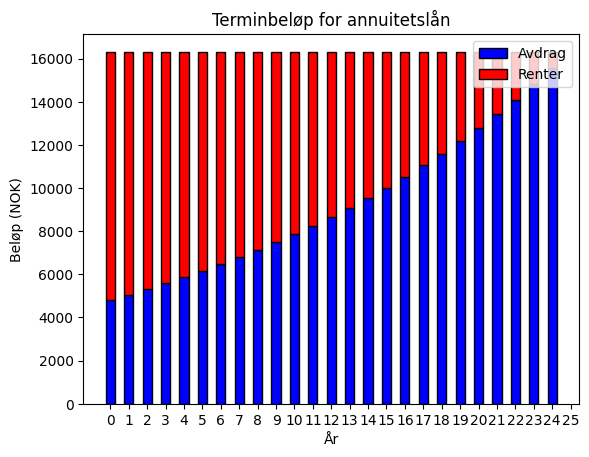

  År  Termin        Avdrag         Rente   Terminbeløp  Kumulativ Rente  \
   1       1   4819.065179  11500.000000  16319.065179     11500.000000   
   2       2   5060.018438  11259.046741  16319.065179     22759.046741   
   3       3   5313.019360  11006.045819  16319.065179     33765.092560   
   4       4   5578.670328  10740.394851  16319.065179     44505.487411   
   5       5   5857.603844  10461.461335  16319.065179     54966.948746   
   6       6   6150.484036  10168.581143  16319.065179     65135.529889   
   7       7   6458.008238   9861.056941  16319.065179     74996.586830   
   8       8   6780.908650   9538.156529  16319.065179     84534.743359   
   9       9   7119.954082   9199.111096  16319.065179     93733.854455   
  10      10   7475.951787   8843.113392  16319.065179    102576.967847   
  11      11   7849.749376   8469.315803  16319.065179    111046.283650   
  12      12   8242.236845   8076.828334  16319.065179    119123.111984   
  13      13   8654.34868

In [7]:
# Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
    terminbeløp_per_periode = lånebeløp * annuitetsfaktor
    total_terminbeløp = terminbeløp_per_periode * antall_perioder

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere
lånebeløp = 230000
rente = 0.05
antall_år = 25
antall_perioder_per_år = 1

# Beregninger
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

# Eksamensoppgaver

In [ ]:
#Oppgave 1 - Del 2 - Eksamen høsten 2023
import numpy as np

# Definerer funksjonen T(x) som modellerer temperaturen i havet i Sørlandet
def T(x):
    return (-1/1000) * (0.0028*x**3 - x**2 + 25*x - 3800)

# a) Finner forskjellen mellom høyeste og laveste temperatur de første 300 dagene i 2021
# Lager en liste med x-verdier fra 0 til 300
x_values = np.arange(0, 300)
# Lager en liste med tilsvarende temperaturer ved å bruke T(x)-funksjonen
temperatures = T(x_values)
# Finner maksimums- og minimumsverdien i temperaturene
max_temp = np.max(temperatures)
min_temp = np.min(temperatures)
# Beregner forskjellen mellom maksimums- og minimumsverdien
temp_diff = max_temp - min_temp

# b) Finner gjennomsnittstemperaturøkningen mellom dag 60 og dag 90
# Lager en liste med x-verdier fra 60 til 90 (mars har 31 dager, men vi vil ekskludere dag 90)
x_values_march = np.arange(60, 90)
# Lager en liste med tilsvarende temperaturer ved å bruke T(x)-funksjonen
temperatures_march = T(x_values_march)
# Beregner temperaturøkningene for hver dag
temp_increases = np.diff(temperatures_march)
# Beregner gjennomsnittstemperaturøkningen
avg_temp_increase = np.mean(temp_increases)

# Skriver ut svarene til skjermen med to desimalers nøyaktighet
print(f"a) Forskjellen mellom høyeste og laveste temperatur de første 300 dagene i 2021 er {temp_diff:.2f} grader celsius.")
print(f"b) Gjennomsnittstemperaturøkningen mellom dag 60 og dag 90 er {avg_temp_increase:.2f} grader celsius.")


In [ ]:
#Oppgave 9 Prøveeksamen 2024

import math

def f(x):
    return 4000 * 0.912**x

def opprinnelig_oljemengde():
    return f(0)

def oljelekkasjehastighet():
    lekkasjeprosent_per_time = (0.912-1) * 100 # Må basse på å bytte ut vekstfaktoren med det du har :)
    return lekkasjeprosent_per_time

def tegn_graf():
    import matplotlib.pyplot as plt
    import numpy as np

    x_verdier = np.linspace(0, 60, 100)
    y_verdier = [f(x) for x in x_verdier]

    plt.plot(x_verdier, y_verdier)
    plt.xlabel("Tid (timer)")
    plt.ylabel("Gjenværende olje (liter)")
    plt.title("Oljelekkasje over tid")
    plt.grid(True)
    plt.show()

def olje_igjen_etter_timer(timer):
    return f(timer)

def tid_for_halvparten_av_oljelekkasje():
    halv_olje = opprinnelig_oljemengde() / 2
    x = math.log(halv_olje / 4000) / math.log(0.912)
    return x

def gjennomsnittlig_vekstfart():
    f_10 = f(10)
    f_20 = f(20)
    gjennomsnittlig_rate = (f_20 - f_10) / (20 - 10)
    return gjennomsnittlig_rate

def øyeblikkelig_vekstfart_ved_10():
    derivert_ved_10 = 4000 * 0.912**10 * math.log(0.912)
    return derivert_ved_10


# Testing av funksjonene
print(f"Opprinnelig oljemengde: {opprinnelig_oljemengde()} liter")
print(f"Oljelekkasjehastighet per time: {oljelekkasjehastighet():.2f}%")
tegn_graf()
print(f"Olje igjen etter 20 timer: {olje_igjen_etter_timer(20):.2f} liter")
print(f"Tid for halvparten av oljelekkasje: {tid_for_halvparten_av_oljelekkasje():.2f} timer")
print(f"Gjennomsnittlig vekstfart mellom x=10 og x=20: {gjennomsnittlig_vekstfart():.2f} liter/time")
print(f"Øyeblikkelig vekstfart ved x=10: {øyeblikkelig_vekstfart_ved_10():.2f} liter/time")


In [ ]:
#Oppgave Oppgave 7 - Del 2 - Eksamen høsten 2023

def U(t):
    return 40*(1-5/100)**t   # (1-5/100) er vekstfaktor.

def SamledeUtslipp(n):   # Funksjon som gir oss samlede utskipp etter n år
    SumUtslipp = 0             # Sette første sum lik null siden sum første året er det samme som funksjonsverdi (u) i t=0
    for i in range(n):
        SumUtslipp += U(i)
    return print(f'Det samlede utslippet etter {n} år er på u. {round(SumUtslipp,2)}')

SamledeUtslipp(1000)

In [ ]:
#Eksamen 2023 Oppgave 6

inntekt_2021 = 490000  # Malenes inntekt i 2021
pris_leilighet = 2500000  # Kostnad for leiligheten
egenkapital = 400000  # Malenes egenkapital
studielan = 250000  # Malenes studielån

total_gjeld = egenkapital + studielan

lanbelop = min(5 * inntekt_2021, total_gjeld)

oppfyller_egenkapitalkrav = egenkapital >= (0.15 * pris_leilighet)

kan_fa_boliglan = lanbelop >= pris_leilighet and oppfyller_egenkapitalkrav

if kan_fa_boliglan:
    print("Malene kan få boliglån for å kjøpe leiligheten.")
else:
    print("Malene oppfyller ikke kravene for å få boliglån.") 

# Spill og morro

In [2]:
import turtle
import time

# Setup
t = turtle.Turtle()
turtle.setup(450, 500)
t.speed(0)  # Set speed to the maximum
turtle.bgcolor("lightblue")

# Function to draw a filled square
def draw_square(color):
    t.begin_fill()
    t.fillcolor(color)
    for _ in range(4):
        t.fd(30)
        t.left(90)
    t.end_fill()
    t.fd(30)

# Function for turning back (used for positioning)
def rotate_and_move():
    t.left(90)
    t.fd(60)
    t.left(90)

# Function to draw a series of squares
def draw_row(count, color):
    for _ in range(count):
        draw_square(color)

# Position the turtle to start drawing
t.hideturtle()
t.up()
t.goto(-180, -240)

# --- Drawing Levels ---

# Level 1: Boots (brown)
t.color("brown")
draw_row(4, "brown")
t.fd(120)
draw_row(4, "brown")
rotate_and_move()
t.fd(30)

# Level 2
draw_row(3, "brown")
t.fd(120)
draw_row(3, "brown")

# Level 3: Pants (blue)
t.rt(180)
t.fd(30)
t.color("blue")
draw_row(3, "blue")
t.fd(60)
draw_row(3, "blue")
t.fd(60)
rotate_and_move()

# Level 4
t.color("orange")
draw_row(2, "orange")
t.color("blue")
draw_row(3, "blue")
draw_row(2, "blue")
t.color("orange")
draw_row(2, "orange")
t.rt(180)

# Level 5
draw_row(3, "blue")
t.color("blue")
draw_row(3, "blue")
draw_row(3, "orange")
rotate_and_move()

# Level 6
draw_row(2, "blue")
t.color("red")
draw_square("red")
t.color("blue")
draw_square("blue")
t.color("yellow")
draw_square("yellow")
t.color("blue")
draw_row(2, "blue")
t.color("yellow")
draw_square("yellow")
t.color("blue")
draw_square("blue")
t.color("red")
draw_square("red")
t.color("orange")
draw_row(2, "orange")
t.rt(180)

# Level 7: Shirt (red/blue)
t.color("red")
draw_row(4, "red")
t.color("blue")
draw_row(4, "blue")
t.color("red")
draw_row(4, "red")
rotate_and_move()

# Level 8
t.fd(30)
draw_row(3, "red")
t.color('blue')
draw_square("blue")
t.color("red")
draw_row(2, "red")
t.color("blue")
draw_square("blue")
t.color("red")
draw_row(3, "red")
t.rt(180)
t.fd(30)

# Level 9
draw_row(2, "blue")
draw_square("blue")
t.color("red")
draw_row(2, "red")
t.color("blue")
draw_square("blue")
t.color("red")
draw_row(2, "red")
rotate_and_move()
t.fd(30)

# Level 10: Head (orange)
t.color('orange')
draw_row(3, "orange")
draw_row(3, "orange")
t.fd(30)
t.rt(180)

# Level 11
t.color("brown")
draw_square("brown")
t.color("orange")
draw_row(4, "orange")
t.color("black")
draw_row(4, "black")
rotate_and_move()

# Level 12: Final square
draw_square("brown")  # Adjusted to match the pattern

# Delay before exit
time.sleep(1)


In [ ]:
import pygame
import random

# Initialiser Pygame og mixer for lyd
pygame.init()
pygame.mixer.init()

# Definer farger
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)

# Skjermstørrelse
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600

# Last inn lyder med feilhåndtering
try:
    shoot_sound = pygame.mixer.Sound("shoot.wav")
except FileNotFoundError:
    print("shoot.wav ikke funnet. Skyte-lyd vil ikke bli spilt.")
    shoot_sound = None

try:
    explosion_sound = pygame.mixer.Sound("explosion.wav")
except FileNotFoundError:
    print("explosion.wav ikke funnet. Eksplosjons-lyd vil ikke bli spilt.")
    explosion_sound = None

# Spillerklasse
class Player(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = pygame.Surface([50, 50])
        self.image.fill(WHITE)
        self.rect = self.image.get_rect()
        self.rect.center = (SCREEN_WIDTH // 2, SCREEN_HEIGHT - 50)
        self.speed_x = 0

    def update(self):
        self.rect.x += self.speed_x
        if self.rect.right > SCREEN_WIDTH:
            self.rect.right = SCREEN_WIDTH
        if self.rect.left < 0:
            self.rect.left = 0

    def shoot(self):
        bullet = Bullet(self.rect.centerx, self.rect.top)
        all_sprites.add(bullet)
        bullets.add(bullet)
        if shoot_sound:
            shoot_sound.play()

# Fiendeklasse
class Enemy(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = pygame.Surface([50, 50])
        self.image.fill(RED)
        self.rect = self.image.get_rect()
        self.rect.x = random.randrange(SCREEN_WIDTH - self.rect.width)
        self.rect.y = random.randrange(-100, -40)
        self.speed_y = random.randrange(1, 8)

    def update(self):
        self.rect.y += self.speed_y
        if self.rect.top > SCREEN_HEIGHT:
            self.rect.x = random.randrange(SCREEN_WIDTH - self.rect.width)
            self.rect.y = random.randrange(-100, -40)
            self.speed_y = random.randrange(1, 8)

# Kuleklasse
class Bullet(pygame.sprite.Sprite):
    def __init__(self, x, y):
        super().__init__()
        self.image = pygame.Surface([10, 20])
        self.image.fill(GREEN)
        self.rect = self.image.get_rect()
        self.rect.centerx = x
        self.rect.top = y
        self.speed_y = -10

    def update(self):
        self.rect.y += self.speed_y
        if self.rect.bottom < 0:
            self.kill()

# Sett opp skjerm
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Skytespill")

# Lag grupper for sprites
all_sprites = pygame.sprite.Group()
enemies = pygame.sprite.Group()
bullets = pygame.sprite.Group()

# Lag spiller
player = Player()
all_sprites.add(player)

# Lag fiender
for i in range(8):
    enemy = Enemy()
    all_sprites.add(enemy)
    enemies.add(enemy)

# Poengsystem
score = 0
font = pygame.font.SysFont(None, 36)

def draw_text(surf, text, size, x, y):
    font = pygame.font.SysFont(None, size)
    text_surface = font.render(text, True, WHITE)
    text_rect = text_surface.get_rect()
    text_rect.midtop = (x, y)
    surf.blit(text_surface, text_rect)

# Spill-løkke
running = True
clock = pygame.time.Clock()

while running:
    # Håndter hendelser
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                player.speed_x = -5
            elif event.key == pygame.K_RIGHT:
                player.speed_x = 5
            elif event.key == pygame.K_SPACE:
                player.shoot()
        elif event.type == pygame.KEYUP:
            if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                player.speed_x = 0

    # Oppdater sprites
    all_sprites.update()

    # Sjekk for kollisjoner
    hits = pygame.sprite.groupcollide(enemies, bullets, True, True)
    for hit in hits:
        if explosion_sound:
            explosion_sound.play()
        score += 10
        enemy = Enemy()
        all_sprites.add(enemy)
        enemies.add(enemy)

    # Tegn/skjermoppdatering
    screen.fill(BLACK)
    all_sprites.draw(screen)
    draw_text(screen, f"Score: {score}", 36, SCREEN_WIDTH // 2, 10)
    pygame.display.flip()

    # Begrens FPS
    clock.tick(60)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.13.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
shoot.wav ikke funnet. Skyte-lyd vil ikke bli spilt.
explosion.wav ikke funnet. Eksplosjons-lyd vil ikke bli spilt.


# Fysikk 2. klasse 

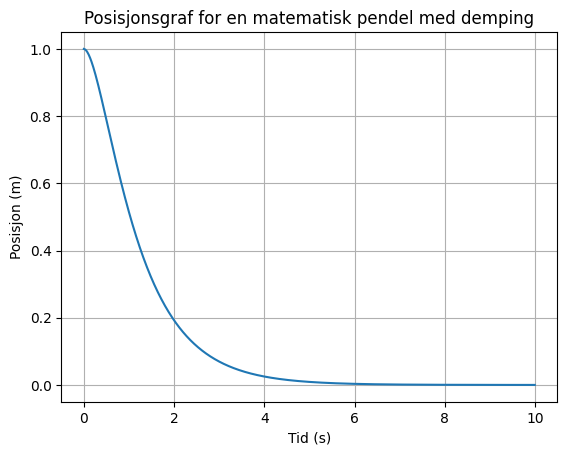

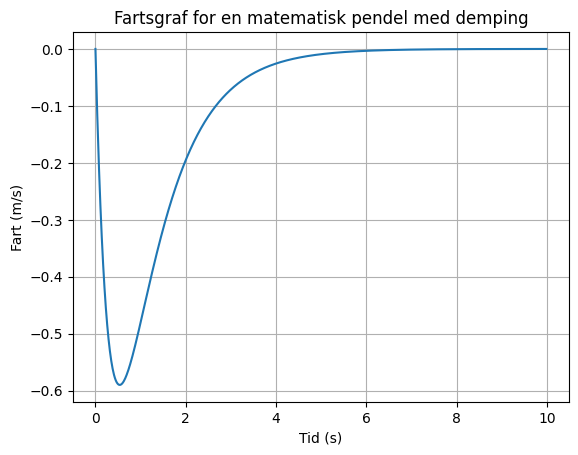

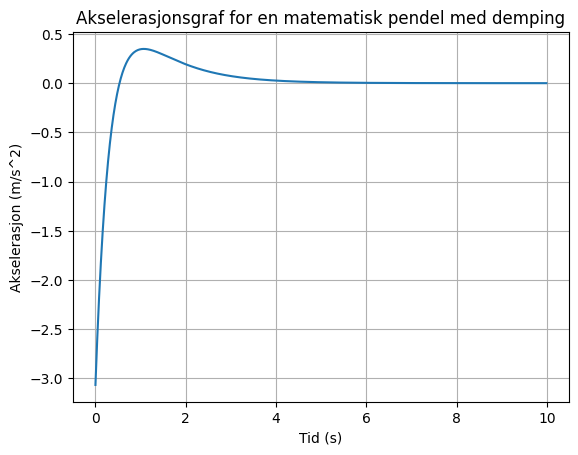

Vinkelhastighet (ω): 1.75 rad/s
Svingetid/periodetid (T): 3.59 s
Frekvens (f): 0.28 Hz

Svingningstype: Overdempet svingning
Funksjonsuttrykk for posisjonsgrafen: y(t) = -0.53 * e^(-1.03t) + 1.53 * e^(-2.97t)
Funksjonsuttrykk for fartsgrafen: v(t) = y'(t) = 0.55 * e^(-1.03t) + -4.55 * e^(-2.97t)
Funksjonsuttrykk for akselerasjonsgrafen: a(t) = y''(t) = -0.57 * e^(-1.03t) + 13.51 * e^(-2.97t)


In [7]:
# Matematisk pendel med demping og test for kritisk-, under- eller over-dempet svingning
import numpy as np
import matplotlib.pyplot as plt

# Pendelvariabler
m = 2.5  # masse i kg
q = 10.0  # dempingsfaktor i Ns/m
g = 9.81  # tyngdeakselerasjon i m/s^2
l = 3.20  # lengde på pendelsnor i meter
y0 = 1.0  # initial posisjon i meter
y_prime0 = 0  # initial fart i meter/sekund

# Beregningsvariabler
a = m * l
b = q * l
c = m * g

# Tidsvariabler
dt = 0.01  # tidssteg
t = np.arange(0, 10, dt)  # tidsarray

# Løsning av differensiallikningen
y = np.zeros_like(t)
y[0] = y0
y_prime = np.zeros_like(t)
y_prime[0] = y_prime0

for i in range(1, len(t)):
    y_double_prime = -b/a * y_prime[i-1] - c/a * y[i-1]
    y_prime[i] = y_prime[i-1] + y_double_prime * dt
    y[i] = y[i-1] + y_prime[i] * dt

# Beregning av analysene
omega = np.sqrt(g / l)  # vinkelhastighet
T = 2 * np.pi / omega  # svingetid/periodetid
f = omega / (2 * np.pi)  # frekvens
q_crit = 2 * m * omega  # kritisk dempingsfaktor

# Svingningstype
if q > q_crit:
    swing_type = "Overdempet svingning"
elif q < q_crit:
    swing_type = "Underdempet svingning"
else:
    swing_type = "Kritisk dempet svingning"

# Plotting av posisjonsgraf
plt.figure()
plt.plot(t, y)
plt.xlabel('Tid (s)')
plt.ylabel('Posisjon (m)')
plt.title('Posisjonsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Plotting av fartsgraf
plt.figure()
plt.plot(t, y_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Fart (m/s)')
plt.title('Fartsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Beregning av akselerasjon
y_double_prime = -b/a * y_prime - c/a * y

# Plotting av akselerasjonsgraf
plt.figure()
plt.plot(t, y_double_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Akselerasjon (m/s^2)')
plt.title('Akselerasjonsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Skriv ut analysene
print("Vinkelhastighet (ω): {:.2f} rad/s".format(omega))
print("Svingetid/periodetid (T): {:.2f} s".format(T))
print("Frekvens (f): {:.2f} Hz".format(f))
print()
print("Svingningstype:", swing_type)

# Løsning av karakteristisk likning
r1 = ((-q*l) + np.sqrt(((q*l)**2)-(4*m*g*l*m))) / (2*m*l)
r2 = ((-q*l) - np.sqrt(((q*l)**2)-(4*m*g*l*m))) / (2*m*l)


# Beregning av A og B
A = (y_prime0 - r1 * y0) / (r2 - r1)
B = y0 - A

# Skriv ut funksjonsuttrykkene
print("Funksjonsuttrykk for posisjonsgrafen: y(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A, r1, B, r2))
print("Funksjonsuttrykk for fartsgrafen: v(t) = y'(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A * r1, r1, B * r2, r2))
print("Funksjonsuttrykk for akselerasjonsgrafen: a(t) = y''(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A * r1**2, r1, B * r2**2, r2))

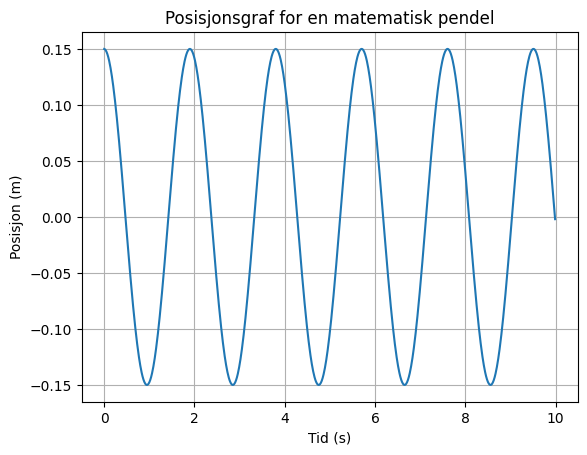

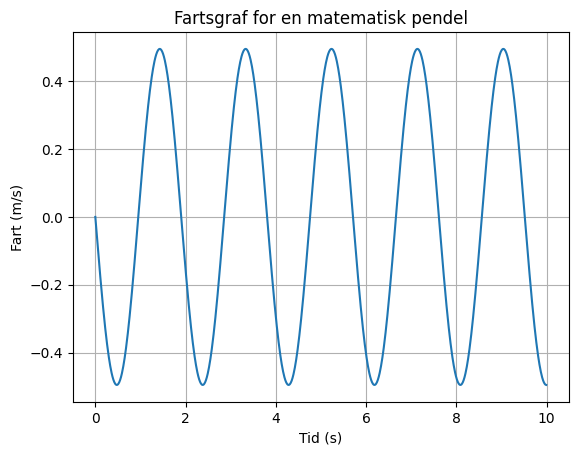

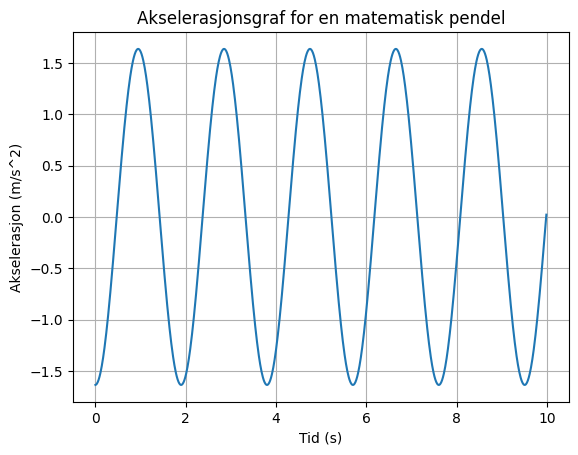

Vinkelhastighet (ω): 3.30 rad/s
Svingetid/periodetid (T): 1.90 s
Frekvens (f): 0.53 Hz
Amplitude: 0.15 m
Posisjonsfunksjon (y(t)): y(t) = 0.00 * sin(3.30 * t) + 0.15 * cos(3.30 * t)
Fartfunksjon (y'(t)): v(t) = y'(t) = 0.00 * cos(3.30 * t) + -0.50 * sin(3.30 * t)
Akselerasjonsfunksjon (y''(t)): a(t) = y''(t) = -0.00 * sin(3.30 * t) + -1.64 * cos(3.30 * t)


In [5]:
# Matematisk pendel uten demping
import numpy as np
import matplotlib.pyplot as plt

# Pendelvariabler
m = 0.135  # masse i kg
g = 9.81  # tyngdeakselerasjon i m/s^2
l = 0.9  # lengde på pendelsnor i meter
y0 = 0.15  # initial posisjon i meter
y_prime0 = 0  # initial fart i meter/sekund

# Beregningsvariabler
a = m * l
c = m * g

# Tidsvariabler
dt = 0.01  # tidssteg
t = np.arange(0, 10, dt)  # tidsarray

# Løsning av differensiallikningen
y = np.zeros_like(t)
y[0] = y0
y_prime = np.zeros_like(t)
y_prime[0] = y_prime0

for i in range(1, len(t)):
    y_double_prime = -c/a * y[i-1]
    y_prime[i] = y_prime[i-1] + y_double_prime * dt
    y[i] = y[i-1] + y_prime[i] * dt

# Beregning av analysene
omega = np.sqrt(g / l)  # vinkelhastighet
T = 2 * np.pi / omega  # svingetid/periodetid
f = omega / (2 * np.pi)  # frekvens
A = np.max(np.abs(y))  # amplitude
C = y_prime0 / np.sqrt(g / l)  # amplitude
B = y0  # konstant

# Plotting av posisjonsgraf
plt.figure()
plt.plot(t, y)
plt.xlabel('Tid (s)')
plt.ylabel('Posisjon (m)')
plt.title('Posisjonsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Plotting av fartsgraf
plt.figure()
plt.plot(t, y_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Fart (m/s)')
plt.title('Fartsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Beregning av akselerasjon
y_double_prime = -c/a * y

# Plotting av akselerasjonsgraf
plt.figure()
plt.plot(t, y_double_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Akselerasjon (m/s^2)')
plt.title('Akselerasjonsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Skriv ut analysene
print("Vinkelhastighet (ω): {:.2f} rad/s".format(omega))
print("Svingetid/periodetid (T): {:.2f} s".format(T))
print("Frekvens (f): {:.2f} Hz".format(f))
print("Amplitude: {:.2f} m".format(A))

# Skriv ut funksjonene
print("Posisjonsfunksjon (y(t)): y(t) = {:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)".format(C, omega, B, omega))
print("Fartfunksjon (y'(t)): v(t) = y'(t) = {:.2f} * cos({:.2f} * t) + {:.2f} * sin({:.2f} * t)".format(C*omega, omega, -B*omega, omega))
print("Akselerasjonsfunksjon (y''(t)): a(t) = y''(t) = {:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)".format(-C*omega**2, omega, -B*omega**2, omega))

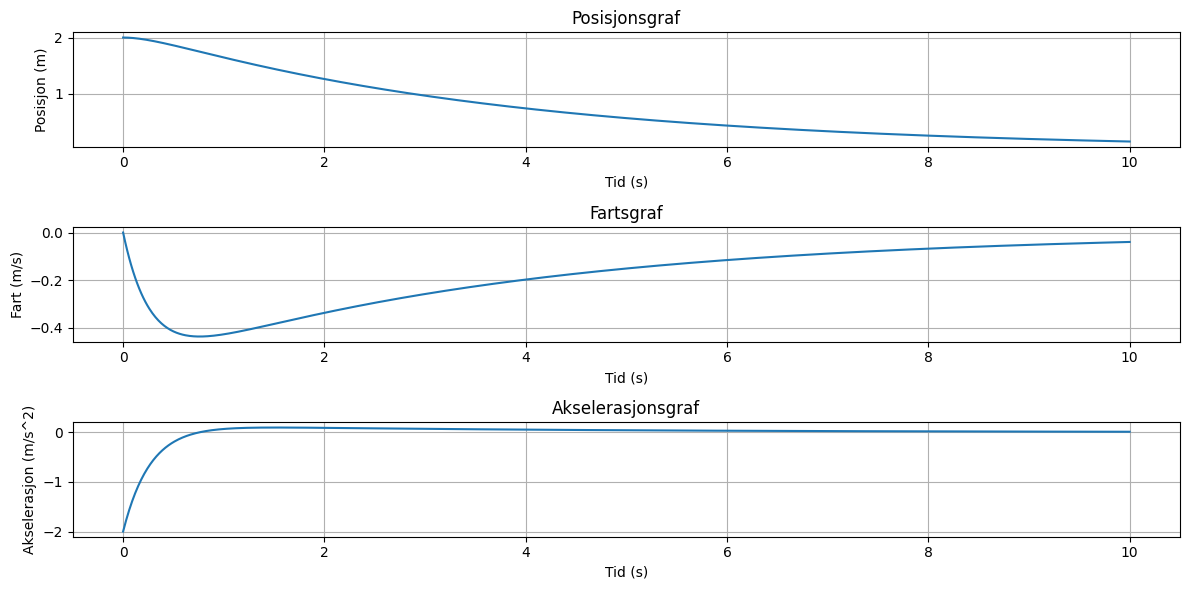

Svingningen er overdempet.
Posisjon funksjon: y(t) = exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t))
Fart funksjon: v(t) = 0.00 * exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)) + exp(0.00 * t) * ((-0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)))
Akselerasjon funksjon: a(t) = 0.00 * exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)) + (0.00 * exp(0.00 * t) * (0.00 * cos(0.00 * t) + -0.00 * sin(0.00 * t)) + (exp(0.00 * t)) * (-0.00 * sin(0.00 * t) + -0.00 * cos(0.00 * t))
Svingetid/periodetid (T): ∞ [s]
Vinkelhastighet (ω): 1 [rad/s]
Frekvens (f): 0.16 [Hz]
Svingetid/periodetid uten demping (T0): 6.28 [s]
Posisjon funksjon: y(t) = 2.15 * exp(-0.27 * t) + -0.15 * exp(-3.73 * t)
Fart funksjon: v(t) = y'(t) = 0.58 * exp(-3.73 * t) + -0.58 * exp(-0.27 * t)
Akselerasjon funksjon: a(t) = y''(t) = -2.15 * exp(-3.73 * t) + 0.15 * exp(-0.27 * t)


In [8]:
# Elastisk pendel med demping og test for kritisk-, under- eller over-dempet svingning
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def elastisk_pendel_med_demping(m, q, D, y0, v0, t_start, t_slutt, antall_steg):
    a = m
    b = q
    c = D

    def pendel_derivater(state, t):
        y, v = state
        return v, -(b/a) * v - (c/a) * y

    t = np.linspace(t_start, t_slutt, antall_steg)
    init_state = [y0, v0]
    state = odeint(pendel_derivater, init_state, t)
    y = state[:, 0]
    v = state[:, 1]
    a = -(b/a) * v - (c/a) * y

    plt.figure(figsize=(12, 6))

    plt.subplot(311)
    plt.plot(t, y)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Posisjon (m)')
    plt.title('Posisjonsgraf')

    plt.subplot(312)
    plt.plot(t, v)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Fart (m/s)')
    plt.title('Fartsgraf')

    plt.subplot(313)
    plt.plot(t, a)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Akselerasjon (m/s^2)')
    plt.title('Akselerasjonsgraf')

    plt.tight_layout()
    plt.show()

    discriminant = (q**2 - 4*m*D)  # Calculate the discriminant of the characteristic equation

    kritisk_demping = 2 * np.sqrt(D * m)
    if q > kritisk_demping:
        print("Svingningen er overdempet.")
    elif q < kritisk_demping:
        print("Svingningen er underdempet.")
    else:
        print("Svingningen er kritisk dempet.")

    if discriminant < 0:
        utregning_part = np.abs(discriminant)
        complex_part = (np.sqrt(utregning_part))/(2*m)
        real_part = (-q)/(2*m)
        B = y0
        A = ((v0-(real_part*y0))/complex_part)
    else:
        real_part = 0.0  # Default value if discriminant is non-negative
        complex_part = 0.0
        A = 0.0
        B = 0.0

    print("Posisjon funksjon: y(t) = exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t))".format(real_part, A, complex_part, B, complex_part))
    print("Fart funksjon: v(t) = {:.2f} * exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)) + exp({:.2f} * t) * (({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)))".format(real_part, real_part, A, complex_part, B, complex_part, real_part, -B*complex_part, complex_part, A*complex_part, complex_part))
    print("Akselerasjon funksjon: a(t) = {:.2f} * exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)) + ({:.2f} * exp({:.2f} * t) * ({:.2f} * cos({:.2f} * t) + {:.2f} * sin({:.2f} * t)) + (exp({:.2f} * t)) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t))".format(
    real_part**2, real_part, A, complex_part, B, complex_part, real_part, real_part, A*complex_part,
    complex_part, -B*complex_part, complex_part, real_part, -A*complex_part**2, complex_part, -B*complex_part**2,
    complex_part))
    
    omega = np.sqrt(D / m)
    f = omega / (2 * np.pi)
    T0 = (2 * np.pi) / omega

    if complex_part != 0.0:  # Check if complex_part is non-zero before division
        print("Svingetid/periodetid (T): {:.3g} [s]".format((2 * np.pi) / complex_part))
    else:
        print("Svingetid/periodetid (T): ∞ [s]")
    print("Vinkelhastighet (ω): {:.3g} [rad/s]".format(omega))
    print("Frekvens (f): {:.2g} [Hz]".format(f))
    print("Svingetid/periodetid uten demping (T0): {:.3g} [s]".format(T0))

    r1 = (-q + np.sqrt(discriminant)) / (2*m)
    r2 = (-q - np.sqrt(discriminant)) / (2*m)

    B = (v0 - (r1 * y0)) / (r2 - r1)
    A = y0 - B

    print("Posisjon funksjon: y(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(A, r1, B, r2))
    print("Fart funksjon: v(t) = y'(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(B*r2, r2, A*r1, r1))
    print("Akselerasjon funksjon: a(t) = y''(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(B*r2**2, r2, A*r1**2, r1))

# Test eksempel
masse = 1.0  # kg
dempningsfaktor = 4  # (Ns/m)
fjaerstivhet = 1  # N/m
y_start = 2  # m
v_start = 0.0  # m/s
tid_start = 0.0  # s
tid_slutt = 10.0  # s
antall_steg = 1000

elastisk_pendel_med_demping(masse, dempningsfaktor, fjaerstivhet, y_start, v_start, tid_start, tid_slutt, antall_steg)

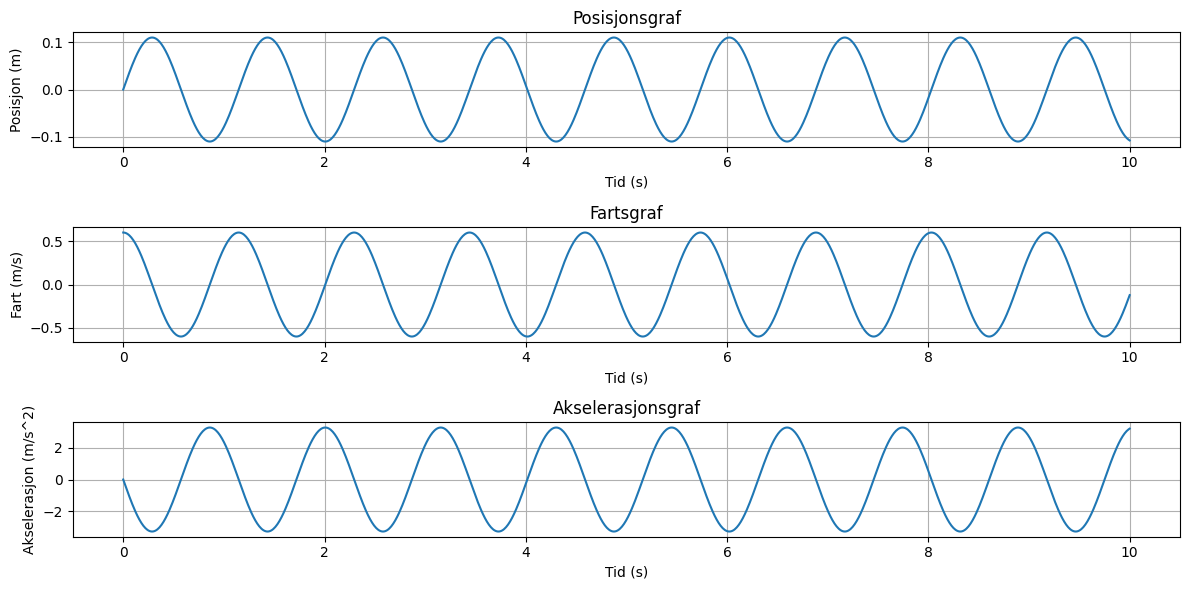

Vinkelhastighet (ω): 5.48 [rad/s]
Svingetid/periodetid (T): 1.15 [s]
Frekvens (f): 0.87 [Hz]
Amplitude (A): 0.11 [m]
Amplitude_alt (A2): 0.11 [m]
A: 0.11 [m]
B: 0.00 [m]
Fase vinkel (ϕ): 0.00 [rad]
Total energi til bevegelsen (E): 0.03 [J]
Total energi til bevegelsen (E) alternativ utregning: 0.03 [J]

y(t) = 0.11 * sin(5.48t) + 0.00 * cos(5.48t)

v(t) = -0.00 * sin(5.48t) + 0.60 * cos(5.48t)

a(t) = -0.00 * cos(5.48t) + -3.29 * sin(5.48t)


In [1]:
# Elastisk pendel uten demping
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def elastisk_pendel_uten_demping(m, k, y0, v0, t_start, t_slutt, antall_steg):
    a = m
    c = k

    def pendel_derivater(state, t):
        y, v = state
        return v, -(c/a) * y

    t = np.linspace(t_start, t_slutt, antall_steg)
    init_state = [y0, v0]
    state = odeint(pendel_derivater, init_state, t)
    y = state[:, 0]
    v = state[:, 1]
    a = -(c/a) * y

    plt.figure(figsize=(12, 6))

    plt.subplot(311)
    plt.plot(t, y)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Posisjon (m)')
    plt.title('Posisjonsgraf')

    plt.subplot(312)
    plt.plot(t, v)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Fart (m/s)')
    plt.title('Fartsgraf')

    plt.subplot(313)
    plt.plot(t, a)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Akselerasjon (m/s^2)')
    plt.title('Akselerasjonsgraf')

    plt.tight_layout()
    plt.show()

    # Calculate additional values
    omega = np.sqrt(c/m)  # Vinkelhastighet (ω)
    T = 2*np.pi/omega  # Svingetid/periodetid (T)
    f = omega/(2*np.pi)  # Frekvens (f)
    A = v0/omega  # Amplitude (A)
    B = y0  # B
    Amplitude = np.sqrt(A**2 + B**2)
    Amplitude_alt = np.sqrt(y0**2 + (v0**2)/(omega**2))
    phi = np.arctan((y0/v0)*omega)  # Fase vinkel (ϕ)
    E = 1/2*m*v0**2 + 1/2*c*y0**2  # Total energi til bevegelsen (E)
    E_alt = 1/2*c*A**2  # Total energi til bevegelsen (E) alternativ utregning

    # Format and print the values with 3 significant figures
    print("Vinkelhastighet (ω): {:.2f} [rad/s]".format(omega))
    print("Svingetid/periodetid (T): {:.2f} [s]".format(T))
    print("Frekvens (f): {:.2f} [Hz]".format(f))
    print("Amplitude (A): {:.2f} [m]".format(Amplitude))
    print("Amplitude_alt (A2): {:.2f} [m]".format(Amplitude_alt))
    print("A: {:.2f} [m]".format(A))
    print("B: {:.2f} [m]".format(B))
    print("Fase vinkel (ϕ): {:.2f} [rad]".format(phi))
    print("Total energi til bevegelsen (E): {:.2f} [J]".format(E))
    print("Total energi til bevegelsen (E) alternativ utregning: {:.2f} [J]".format(E_alt))

    # Calculate y(t) = A*sin(kt) + B*cos(kt)
    y_t = A*np.sin(omega*t) + B*np.cos(omega*t)
    print("\ny(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(A, omega, B, omega))
    
    # Calculate y'(t) = (-B * k* sin (k*t)) + A* k*cos (k*t)
    v_t = -B*omega*np.sin(omega*t) + A*omega*np.cos(omega*t)
    print("\nv(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(-B*omega, omega, + A*omega, omega))  
    
    # Calculate y''(t) = (-B*k^2* cos (k*t)) - A* k^2*sin (k*t))
    a_t = -B*omega**2*np.cos(omega*t) - A*omega**2*np.sin(omega*t)
    print("\na(t) = {:.2f} * cos({:.2f}t) + {:.2f} * sin({:.2f}t)".format(-B*omega**2, omega, -A*omega**2, omega))  

# Test example
masse = 0.16  # m [Kg]
fjaerstivhet = 4.8  # k [N/m]
y_start = 0.0  # y0 startposisjon [m]
v_start = 0.6  # v0 startfart [m/s]
tid_start = 0.0  # t start [s]
tid_slutt = 10.0  # t slutt [s]
antall_steg = 1000 # Antall prikker på grafene per sekund

elastisk_pendel_uten_demping(masse, fjaerstivhet, y_start, v_start, tid_start, tid_slutt, antall_steg)

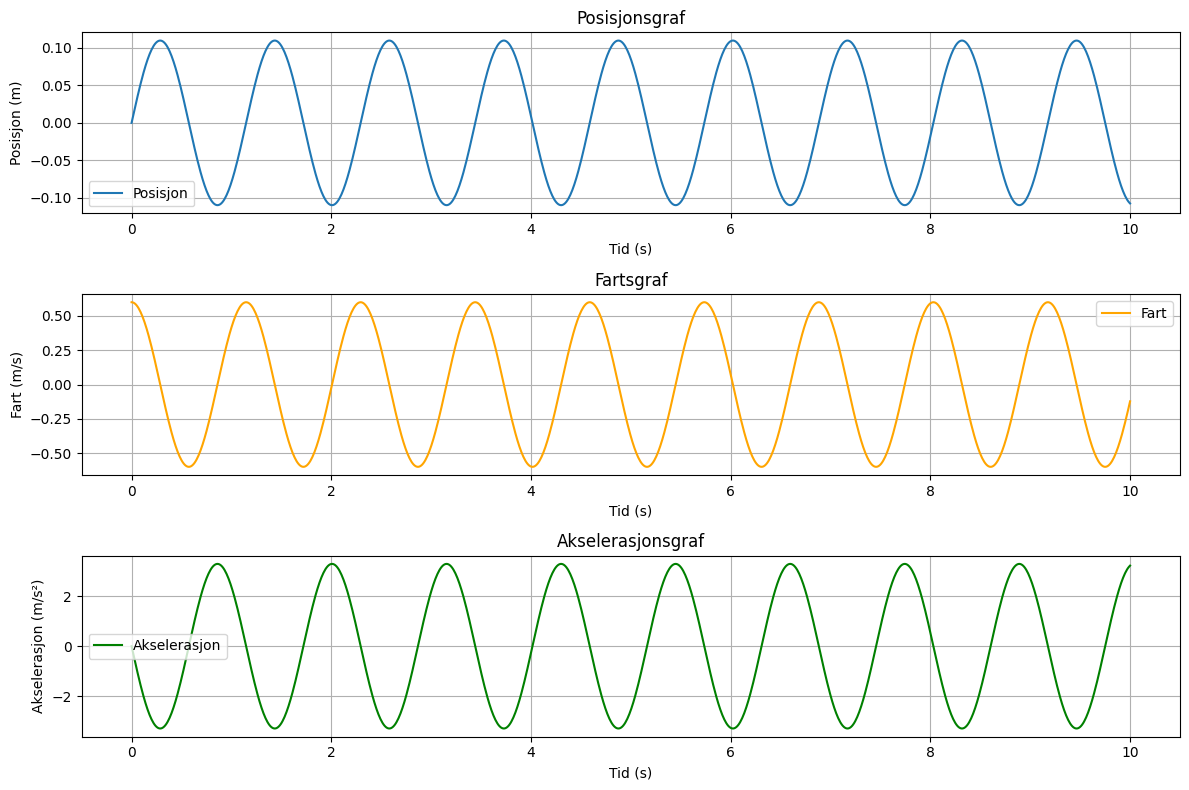

Vinkelhastighet (ω): 5.48 [rad/s]
Svingetid/periodetid (T): 1.15 [s]
Frekvens (f): 0.87 [Hz]
Amplitude (A): 0.11 [m]
Amplitude_alt (A2): 0.11 [m]
A: 0.11 [m]
B: 0.00 [m]
Fase vinkel (ϕ): 0.00 [rad]
Total energi til bevegelsen (E): 0.03 [J]
Total energi til bevegelsen (E) alternativ utregning: 0.03 [J]

y(t) = 0.11 * sin(5.48t) + 0.00 * cos(5.48t)

v(t) = -0.00 * sin(5.48t) + 0.60 * cos(5.48t)

a(t) = -0.00 * cos(5.48t) + -3.29 * sin(5.48t)


In [1]:
# Elastisk pendel uten demping forbedret
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def elastisk_pendel_uten_demping(masse, fjærstivhet, startposisjon, startfart, tid_start, tid_slutt, antall_steg):
    def pendel_derivater(state, t):
        posisjon, fart = state
        akselerasjon = -(fjærstivhet / masse) * posisjon
        return fart, akselerasjon

    tid = np.linspace(tid_start, tid_slutt, antall_steg)
    init_state = [startposisjon, startfart]
    state = odeint(pendel_derivater, init_state, tid)
    posisjon = state[:, 0]
    fart = state[:, 1]
    akselerasjon = -(fjærstivhet / masse) * posisjon

    plt.figure(figsize=(12, 8))

    plt.subplot(311)
    plt.plot(tid, posisjon, label='Posisjon')
    plt.xlabel('Tid (s)')
    plt.ylabel('Posisjon (m)')
    plt.title('Posisjonsgraf')
    plt.grid(True)
    plt.legend()

    plt.subplot(312)
    plt.plot(tid, fart, label='Fart', color='orange')
    plt.xlabel('Tid (s)')
    plt.ylabel('Fart (m/s)')
    plt.title('Fartsgraf')
    plt.grid(True)
    plt.legend()

    plt.subplot(313)
    plt.plot(tid, akselerasjon, label='Akselerasjon', color='green')
    plt.xlabel('Tid (s)')
    plt.ylabel('Akselerasjon (m/s²)')
    plt.title('Akselerasjonsgraf')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    omega = np.sqrt(fjærstivhet / masse)
    T = 2 * np.pi / omega
    f = omega / (2 * np.pi)
    A = startfart / omega
    B = startposisjon
    Amplitude = np.sqrt(A**2 + B**2)
    Amplitude_alt = np.sqrt(startposisjon**2 + (startfart**2) / (omega**2))
    phi = np.arctan((startposisjon / startfart) * omega)
    E = 0.5 * masse * startfart**2 + 0.5 * fjærstivhet * startposisjon**2
    E_alt = 0.5 * fjærstivhet * Amplitude**2

    print("Vinkelhastighet (ω): {:.2f} [rad/s]".format(omega))
    print("Svingetid/periodetid (T): {:.2f} [s]".format(T))
    print("Frekvens (f): {:.2f} [Hz]".format(f))
    print("Amplitude (A): {:.2f} [m]".format(Amplitude))
    print("Amplitude_alt (A2): {:.2f} [m]".format(Amplitude_alt))
    print("A: {:.2f} [m]".format(A))
    print("B: {:.2f} [m]".format(B))
    print("Fase vinkel (ϕ): {:.2f} [rad]".format(phi))
    print("Total energi til bevegelsen (E): {:.2f} [J]".format(E))
    print("Total energi til bevegelsen (E) alternativ utregning: {:.2f} [J]".format(E_alt))

    y_t = A * np.sin(omega * tid) + B * np.cos(omega * tid)
    print("\ny(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(A, omega, B, omega))
    
    v_t = -B * omega * np.sin(omega * tid) + A * omega * np.cos(omega * tid)
    print("\nv(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(-B * omega, omega, A * omega, omega))  
    
    a_t = -B * omega**2 * np.cos(omega * tid) - A * omega**2 * np.sin(omega * tid)
    print("\na(t) = {:.2f} * cos({:.2f}t) + {:.2f} * sin({:.2f}t)".format(-B * omega**2, omega, -A * omega**2, omega))  

# Test example
masse = 0.16  # m [Kg]
fjærstivhet = 4.8  # k [N/m]
startposisjon = 0.0  # y0 startposisjon [m]
startfart = 0.6  # v0 startfart [m/s]
tid_start = 0.0  # t start [s]
tid_slutt = 10.0  # t slutt [s]
antall_steg = 1000  # Antall prikker på grafene per sekund

elastisk_pendel_uten_demping(masse, fjærstivhet, startposisjon, startfart, tid_start, tid_slutt, antall_steg)

Shapiro-Wilk Test:
Teststatistikk: 0.9768
P-verdi: 0.9459
Vi har ikke grunnlag for å si at dataene er normalfordelt,  siden null hypotesen ikke kan forkastes.


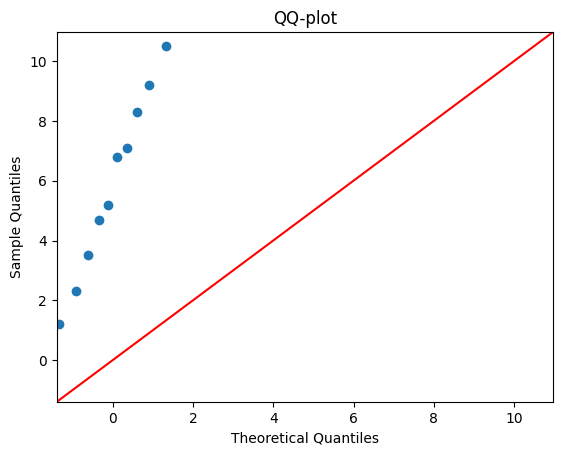

In [1]:
# Test for normal distribusjon - Shapiro- Wilk-testen
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import random

# Opprett ditt valgte datasett som en liste av tall
data = [1.2, 2.3, 3.5, 4.7, 5.2, 6.8, 7.1, 8.3, 9.2, 10.5]

# Gjør Shapiro-Wilk-testen
stat, p = stats.shapiro(data)

# Skriv ut resultatet av Shapiro-Wilk-testen
print("Shapiro-Wilk Test:")
print(f"Teststatistikk: {stat:.4f}")
print(f"P-verdi: {p:.4f}")
if p<0.05:
    print("Dataene ser ut til å være normalfordelt, siden null hypotesen kan forkastes.")
else:
        print("Vi har ikke grunnlag for å si at dataene er normalfordelt,  siden null hypotesen ikke kan forkastes.")

# Lag et QQ-plot
sm.qqplot(np.array(data), line='45')
plt.title("QQ-plot")
plt.show()